## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.
 

## Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Library to split data
from sklearn.model_selection import train_test_split


#To build the desicion tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

### Import Dataset

In [2]:
loan = pd.read_csv('Loan_Modelling.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
data=loan.copy()

In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string
# Looking at 10 random rows
# Setting the random seed via np.random.seed so that
# Getting the same random results every time
np.random.seed(1)
data.sample(n=10)

There are 5000 rows and 14 columns.


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

### Check for duplicate data

In [5]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- No duplicates

### Check the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Insights:

- All data is either int64 or float 64

### Check for missing values

In [7]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing cvalues in the data

### Converting Zip codes in Regions and Binning

In [8]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) 
zipcode = search.by_zipcode("25425")
zipcode

SimpleZipcode(zipcode='25425', zipcode_type='Standard', major_city='Harpers Ferry', post_office_city='Harpers Ferry, WV', common_city_list=['Harpers Ferry', 'Bolivar'], county='Jefferson County', state='WV', lat=39.3, lng=-77.8, timezone='Eastern', radius_in_miles=12.0, area_code_list=['304'], population=12835, population_density=319.0, land_area_in_sqmi=40.24, water_area_in_sqmi=1.25, housing_units=5603, occupied_housing_units=4892, median_home_value=215200, median_household_income=67365, bounds_west=-77.860894, bounds_east=-77.719519, bounds_north=39.403509, bounds_south=39.152981)

- Zipcode will converted to Counties and then in to California Regions

In [9]:
data['County']=data['ZIPCode'].map(lambda x: search.by_zipcode(x).county)


# shift column 'County' to fifth position
fifth_column = data.pop('County')

data.insert(5, 'County', fifth_column)


In [10]:
np.random.seed(1)
data.sample(n=10)

ID  Age  Experience  Income  ZIPCode                County  Family  \
2764  2765   31           5      84    91320        Ventura County       1   
4767  4768   35           9      45    90639    Los Angeles County       3   
3814  3815   34           9      35    94304    Santa Clara County       3   
3499  3500   49          23     114    94550        Alameda County       1   
2735  2736   36          12      70    92131      San Diego County       3   
3922  3923   31           4      20    95616           Yolo County       4   
2701  2702   50          26      55    94305    Santa Clara County       1   
1179  1180   36          11      98    90291    Los Angeles County       3   
932    933   51          27     112    94720        Alameda County       3   
792    793   41          16      98    93117  Santa Barbara County       1   

      CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  \
2764    2.9          3       105              0                   0   
4767    0.9          1       101              0                   1   
3814    1.3          1         0              0                   0   
3499    0.3          1       286              0                   0   
2735    2.6          2       165              0                   0   
3922    1.5          2         0              0                   0   
2701    1.6          2         0              0                   0   
1179    1.2          3         0              0                   1   
932     1.8          2         0              0                   1   
792     4.0          3         0              0                   0   

      CD_Account  Online  CreditCard  
2764           0       0           1  
4767           0       0           0  
3814           0       0           0  
3499           0       1           0  
2735           0       1           0  
3922           0       1           0  
2701           0       1           0  
1179           0       0           1  
932            1       1           1  
792            0       0           1

### Check again the data information including the new column

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   County              4966 non-null   object 
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal_Loan       5000 non-null   int64  
 11  Securities_Account  5000 non-null   int64  
 12  CD_Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

- County shows missing values

In [12]:
# most rows don't have missing values now
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    4966
1      34
dtype: int64

- From the dataset, 0.68% has the county as a missing value, so the missing rows for county will be dropped

In [13]:
data=data.dropna(subset=['County'])

#### The County column will ve convert as categorical

In [14]:
# categorical column should be converted to categorical type 

data['County']=data.County.astype('category')


#### Plot the County distribution on data

<AxesSubplot:xlabel='count', ylabel='County'>

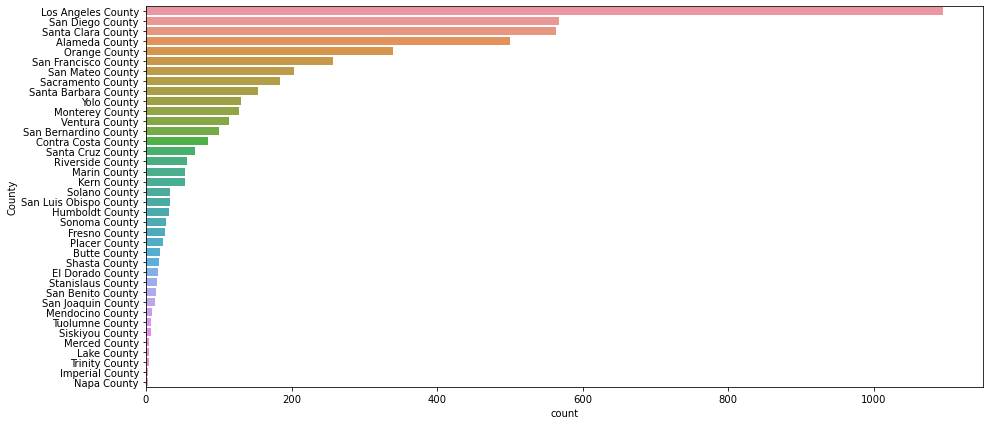

In [15]:
plt.figure(figsize=(15, 7))
sns.countplot(y="County", data=data, order=data["County"].value_counts().index)

- There is 38 counties in the dataset.
- The most popular city is Los Angeles, followed by San Diego, Santa Clara and Alameda.
- The least Important are Napa, Imperial, Trinity, Lake, Merced, Siskiyou, Toulumne and Mendocino.

### Bining Counties

In [16]:
data.County.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

##### Creating directories for:
- Northern California
- Extended Bay Area
- Central California
- Southern California

In [17]:
Northern_California = ["Humboldt County","Placer County","Butte County","Shasta County","El Dorado County","Mendocino County","Lake County","Trinity County","Siskiyou County"]
Extended_Bay_Area = ["Santa Clara County","Alameda County","San Francisco County","San Mateo County","Sacramento County","Yolo County","Contra Costa County","Santa Cruz County","Marin County","Solano County","Sonoma County","Stanislaus County","San Benito County","San Joaquin County","Napa County"]
Central_California = ["Santa Barbara County","Monterey County","San Luis Obispo County","Fresno County","Tuolumne County","Merced County"]
Southern_California= ["Los Angeles County","San Diego County","Orange County","Ventura County","San Bernardino County","Riverside County","Kern County","Imperial County"]


In [18]:
### Creating a function to assingn a Region for each county

def region_combining(x):
    if x in Northern_California:
        return 'Northern_California'
    elif x in Extended_Bay_Area:
        return 'Extended_Bay_Area'
    elif x in Central_California:
        return 'Central_California'
    elif x in Southern_California:
        return 'Southern_California'
    else:
        return x

##### Creating Region as new column

In [19]:
data['Region'] = data['County'].apply(region_combining)
sixth_column = data.pop('Region')
data.insert(6, 'Region', sixth_column)
data['Region']=data.Region.astype('category')

In [20]:
np.random.seed(1)
data.sample(n=10)

ID  Age  Experience  Income  ZIPCode              County  \
3290  3291   52          27     113    92038    San Diego County   
2594  2595   48          23      79    94024  Santa Clara County   
1912  1913   42          16     191    94304  Santa Clara County   
4935  4936   59          33      81    94022  Santa Clara County   
3834  3835   48          22      28    94720      Alameda County   
3982  3983   24           0     119    94566      Alameda County   
4742  4743   58          33      25    92121    San Diego County   
4173  4174   35           9      43    93943     Monterey County   
2215  2216   28           3     193    94501      Alameda County   
2272  2273   27           3      90    91365  Los Angeles County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
3290  Southern_California       1    0.1          3         0              0   
2594    Extended_Bay_Area       1    0.2          2         0              0   
1912    Extended_Bay_Area       3    4.8          2         0              1   
4935    Extended_Bay_Area       2    1.4          1         0              0   
3834    Extended_Bay_Area       1    1.4          3        75              0   
3982    Extended_Bay_Area       1    1.5          1         0              0   
4742  Southern_California       4    0.9          2        90              0   
4173   Central_California       2    0.3          1         0              0   
2215    Extended_Bay_Area       3    4.0          2         0              1   
2272  Southern_California       3    0.8          1         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
3290                   0           0       0           0  
2594                   0           0       0           0  
1912                   1           1       1           0  
4935                   0           0       1           0  
3834                   0           0       1           0  
3982                   0           0       1           0  
4742                   0           0       1           1  
4173                   0           0       1           0  
2215                   0           0       1           0  
2272                   0           0       1           0

#### Plot by Regions

<AxesSubplot:xlabel='count', ylabel='Region'>

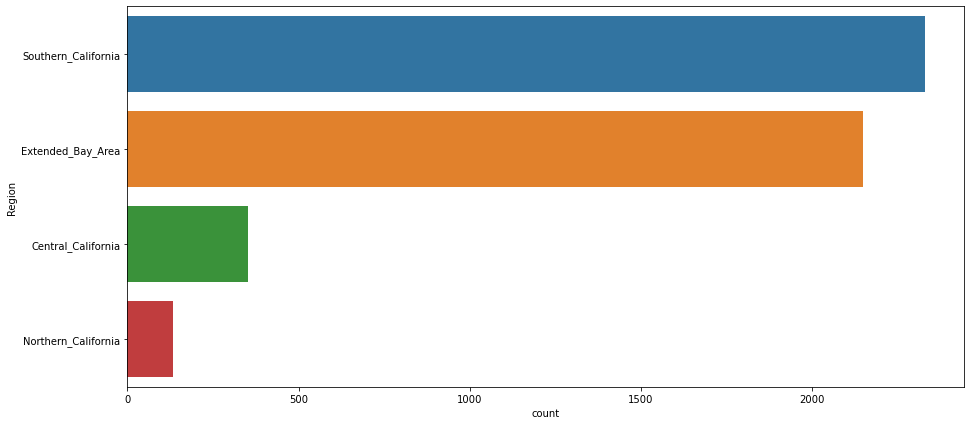

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Region", data=data, order=data["Region"].value_counts().index)

In [22]:
data.Region.value_counts()

Southern_California    2330
Extended_Bay_Area      2151
Central_California      352
Northern_California     133
Name: Region, dtype: int64

- 46% of the population are located in Southern California, followed by Extended Bay Area 43%.

### Give a statistical summary for the dataset

In [23]:
data.describe().T

count          mean          std      min       25%  \
ID                  4966.0   2505.052356  1442.732530      1.0   1257.25   
Age                 4966.0     45.353806    11.462759     23.0     35.00   
Experience          4966.0     20.119815    11.467874     -3.0     10.00   
Income              4966.0     73.827829    46.042272      8.0     39.00   
ZIPCode             4966.0  93167.611357  1760.974843  90005.0  91910.00   
Family              4966.0      2.397100     1.147607      1.0      1.00   
CCAvg               4966.0      1.937016     1.743928      0.0      0.70   
Education           4966.0      1.880387     0.840197      1.0      1.00   
Mortgage            4966.0     56.668747   101.865399      0.0      0.00   
Personal_Loan       4966.0      0.096053     0.294694      0.0      0.00   
Securities_Account  4966.0      0.104108     0.305431      0.0      0.00   
CD_Account          4966.0      0.060814     0.239012      0.0      0.00   
Online              4966.0      0.596859     0.490578      0.0      0.00   
CreditCard          4966.0      0.293596     0.455455      0.0      0.00   

                        50%       75%      max  
ID                   2508.5   3752.75   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93524.0  94608.00  96150.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

 - Age, Expererience and Education, the mean and the median are approximately equal, which suggests it is a normal distribution for both.
 - Income, CCAvg seems to be right-skewed.
 - Negative experience?
 - Mortgage shows that most of the data population don't own a house.
 - Most of the people are confortable using the Online service.
 

### Checking Incorrect Data

In [24]:
## Check unique values
cat_columns = data.describe().columns
cat_columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [25]:
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in ID are :
2047    1
4655    1
549     1
4647    1
2600    1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 4966, dtype: int64
**************************************************
Unique values in Age are :
35    151
43    147
54    143
52    143
58    142
41    136
50    136
56    135
30    135
34    133
57    132
39    131
59    131
46    127
51    127
60    126
45    126
40    125
31    125
55    125
42    124
62    123
29    121
44    120
61    120
33    119
32    118
48    118
49    114
47    113
38    113
53    112
63    108
36    107
37    105
28    103
27     90
65     79
64     78
26     77
25     53
24     27
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
Unique values in Experience are :
 32    153
 9     147
 20    146
 5     145
 23    144
 35    143
 25    141
 28    138
 19    135
 18    135
 26    133
 3     129
 24    128
 16    127
 14    126
 30    126
 22    124
 29

- Unique values on Experience are showing non sense data like negative experience, I will proceed to check if there is a wrong pattern followed by the date.
- 51 customers with negative experience 

#### Check for any pattern when the experience is equal to 0

In [26]:
data[data['Experience']==0].sample(10)

ID  Age  Experience  Income  ZIPCode              County  \
3538  3539   26           0      23    93561         Kern County   
4566  4567   24           0     131    92831       Orange County   
4901  4902   26           0      54    96094     Siskiyou County   
1847  1848   25           0      52    95126  Santa Clara County   
2652  2653   24           0      44    90089  Los Angeles County   
2259  2260   24           0      82    90401  Los Angeles County   
3075  3076   26           0      85    95616         Yolo County   
4551  4552   27           0      28    91330  Los Angeles County   
4080  4081   27           0      40    90068  Los Angeles County   
3147  3148   26           0      30    94024  Santa Clara County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
3538  Southern_California       1    0.1          2         0              0   
4566  Southern_California       1    5.4          1         0              0   
4901  Northern_California       3    1.1          2         0              0   
1847    Extended_Bay_Area       3    2.6          3       159              0   
2652  Southern_California       4    1.6          1       180              0   
2259  Southern_California       3    0.8          1         0              0   
3075    Extended_Bay_Area       2    1.6          3         0              0   
4551  Southern_California       4    1.5          2         0              0   
4080  Southern_California       1    2.0          2       110              0   
3147    Extended_Bay_Area       4    1.3          3         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
3538                   0           0       0           0  
4566                   0           0       1           0  
4901                   0           0       1           0  
1847                   0           0       0           0  
2652                   0           0       1           0  
2259                   0           0       1           0  
3075                   0           0       0           0  
4551                   0           0       1           0  
4080                   0           0       0           1  
3147                   0           0       1           1

- For experience 0 is just customer under 30's some of them with 2-3 education level, already with income and getting responsabilities like personal loans, credit cards and probably their first home

In [27]:
data[data['Experience']==-1].sample(10)


ID  Age  Experience  Income  ZIPCode                 County  \
583    584   24          -1      38    95045      San Benito County   
3425  3426   23          -1      12    91605     Los Angeles County   
2430  2431   23          -1      73    92120       San Diego County   
4015  4016   25          -1     139    93106   Santa Barbara County   
540    541   25          -1     109    94010       San Mateo County   
909    910   23          -1     149    91709  San Bernardino County   
2980  2981   25          -1      53    94305     Santa Clara County   
536    537   25          -1      43    92173       San Diego County   
1173  1174   24          -1      35    94305     Santa Clara County   
4582  4583   25          -1      69    92691          Orange County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
583     Extended_Bay_Area       2   1.70          2         0              0   
3425  Southern_California       4   1.00          1        90              0   
2430  Southern_California       4   2.60          1         0              0   
4015   Central_California       2   2.00          1         0              0   
540     Extended_Bay_Area       4   2.30          3       314              0   
909   Southern_California       1   6.33          1       305              0   
2980    Extended_Bay_Area       3   2.40          2         0              0   
536   Southern_California       3   2.40          2       176              0   
1173    Extended_Bay_Area       2   1.70          2         0              0   
4582  Southern_California       3   0.30          3         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
583                    0           0       1           0  
3425                   0           0       1           0  
2430                   0           0       1           0  
4015                   0           0       0           1  
540                    0           0       1           0  
909                    0           0       0           1  
2980                   0           0       0           0  
536                    0           0       1           0  
1173                   0           0       0           0  
4582                   0           0       1           0

In [28]:
data[data['Experience']==-2].sample(10)


ID  Age  Experience  Income  ZIPCode                County  \
2466  2467   24          -2      80    94105  San Francisco County   
4481  4482   25          -2      35    95045     San Benito County   
4116  4117   24          -2     135    90065    Los Angeles County   
597    598   24          -2     125    92835         Orange County   
2717  2718   23          -2      45    95422           Lake County   
793    794   24          -2     150    94720        Alameda County   
451    452   28          -2      48    94132  San Francisco County   
3796  3797   24          -2      50    94920          Marin County   
2876  2877   24          -2      80    91107    Los Angeles County   
2962  2963   23          -2      81    91711    Los Angeles County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
2466    Extended_Bay_Area       2   1.60          3         0              0   
4481    Extended_Bay_Area       4   1.00          3         0              0   
4116  Southern_California       2   7.20          1         0              0   
597   Southern_California       2   7.20          1         0              0   
2717  Northern_California       4   0.60          2         0              0   
793     Extended_Bay_Area       2   2.00          1         0              0   
451     Extended_Bay_Area       2   1.75          3        89              0   
3796    Extended_Bay_Area       3   2.40          2         0              0   
2876  Southern_California       2   1.60          3       238              0   
2962  Southern_California       2   1.80          2         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
2466                   0           0       1           0  
4481                   0           0       1           0  
4116                   0           0       1           0  
597                    1           0       0           1  
2717                   0           0       1           1  
793                    0           0       1           0  
451                    0           0       1           0  
3796                   1           0       0           0  
2876                   0           0       0           0  
2962                   0           0       0           0

In [29]:
data[data['Experience']==-3].sample(4)


ID  Age  Experience  Income  ZIPCode              County  \
4285  4286   23          -3     149    93555         Kern County   
2618  2619   23          -3      55    92704       Orange County   
4514  4515   24          -3      41    91768  Los Angeles County   
3626  3627   24          -3      28    90089  Los Angeles County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
4285  Southern_California       2    7.2          1         0              0   
2618  Southern_California       3    2.4          2       145              0   
4514  Southern_California       4    1.0          3         0              0   
3626  Southern_California       4    1.0          3         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
4285                   0           0       1           0  
2618                   0           0       1           0  
4514                   0           0       1           0  
3626                   0           0       0           0

- Negative experience doesn't exist, doesnt follow any pattern in terms of the other variables, seems like random information.
- Negative experience will be drop from the data

In [30]:
data.drop( data[ data['Experience'] <= -1 ].index , inplace=True)

#### Checking if Credit Card Avg info is properly correlated with CreditCard

In [31]:
data[data['CCAvg']==0].sample(10)

ID  Age  Experience  Income  ZIPCode                 County  \
2028  2029   42          17       9    91710  San Bernardino County   
198    199   27           3      59    94123   San Francisco County   
4438  4439   43          18      22    90025     Los Angeles County   
4760  4761   50          25      18    95819      Sacramento County   
1960  1961   44          19      30    95616            Yolo County   
1756  1757   42          17      23    95053     Santa Clara County   
4949  4950   29           5      64    94114   San Francisco County   
444    445   64          40      91    93106   Santa Barbara County   
2565  2566   40          15      10    94708         Alameda County   
3252  3253   62          38      78    92521       Riverside County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
2028  Southern_California       2    0.0          3         0              0   
198     Extended_Bay_Area       4    0.0          1        90              0   
4438  Southern_California       2    0.0          3         0              0   
4760    Extended_Bay_Area       2    0.0          1         0              0   
1960    Extended_Bay_Area       4    0.0          2         0              0   
1756    Extended_Bay_Area       2    0.0          3         0              0   
4949    Extended_Bay_Area       4    0.0          1       249              0   
444    Central_California       2    0.0          3         0              0   
2565    Extended_Bay_Area       2    0.0          3       102              0   
3252  Southern_California       2    0.0          3         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
2028                   0           0       0           0  
198                    1           0       1           0  
4438                   0           0       0           0  
4760                   0           0       0           1  
1960                   0           0       1           0  
1756                   0           0       0           0  
4949                   0           0       0           1  
444                    0           0       1           1  
2565                   0           0       1           0  
3252                   0           0       1           0

- Customers with zero credit card average spend should be 0 on Credit Card Category, because he/she is not using neither cc from All Life bank nor issued by any other bank

##### Replacing incorrect data on CCAvg for the right one

In [32]:
data.loc[(data['CCAvg'] ==0) & (data['CreditCard'] ==1),'CCAvg']=1

In [33]:
data[data['CCAvg']==0].sample(10)

ID  Age  Experience  Income  ZIPCode                 County  \
2642  2643   54          29      81    92096       San Diego County   
3522  3523   64          40      90    94028       San Mateo County   
1562  1563   34           9      89    91763  San Bernardino County   
3903  3904   47          23      65    93943        Monterey County   
1481  1482   35           9     179    91125     Los Angeles County   
1960  1961   44          19      30    95616            Yolo County   
128    129   38          14      74    92182       San Diego County   
2071  2072   52          28      83    94705         Alameda County   
1003  1004   25           1      62    94720         Alameda County   
4403  4404   50          24     112    92064       San Diego County   

                   Region  Family  CCAvg  Education  Mortgage  Personal_Loan  \
2642  Southern_California       2    0.0          3         0              0   
3522    Extended_Bay_Area       2    0.0          3       134              0   
1562  Southern_California       1    0.0          1         0              0   
3903   Central_California       1    0.0          1         0              0   
1481  Southern_California       2    0.0          1        76              0   
1960    Extended_Bay_Area       4    0.0          2         0              0   
128   Southern_California       2    0.0          1         0              0   
2071    Extended_Bay_Area       1    0.0          1         0              0   
1003    Extended_Bay_Area       4    0.0          1       229              0   
4403  Southern_California       1    0.0          1         0              0   

      Securities_Account  CD_Account  Online  CreditCard  
2642                   0           0       1           0  
3522                   0           0       0           0  
1562                   0           0       1           0  
3903                   0           0       0           0  
1481                   1           0       1           0  
1960                   0           0       1           0  
128                    1           0       1           0  
2071                   0           0       1           0  
1003                   0           0       1           0  
4403                   0           0       0           0

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4915 non-null   int64   
 1   Age                 4915 non-null   int64   
 2   Experience          4915 non-null   int64   
 3   Income              4915 non-null   int64   
 4   ZIPCode             4915 non-null   int64   
 5   County              4915 non-null   category
 6   Region              4915 non-null   category
 7   Family              4915 non-null   int64   
 8   CCAvg               4915 non-null   float64 
 9   Education           4915 non-null   int64   
 10  Mortgage            4915 non-null   int64   
 11  Personal_Loan       4915 non-null   int64   
 12  Securities_Account  4915 non-null   int64   
 13  CD_Account          4915 non-null   int64   
 14  Online              4915 non-null   int64   
 15  CreditCard          4915 non-null   in

In [35]:
data.describe().T

count          mean          std      min      25%  \
ID                  4915.0   2506.155849  1442.465455      1.0   1261.5   
Age                 4915.0     45.569888    11.322040     24.0     36.0   
Experience          4915.0     20.343438    11.313819      0.0     11.0   
Income              4915.0     73.877925    46.121314      8.0     39.0   
ZIPCode             4915.0  93166.726755  1762.458299  90005.0  91910.0   
Family              4915.0      2.392065     1.148293      1.0      1.0   
CCAvg               4915.0      1.941748     1.740658      0.0      0.7   
Education           4915.0      1.878128     0.840082      1.0      1.0   
Mortgage            4915.0     56.795524   101.975317      0.0      0.0   
Personal_Loan       4915.0      0.097050     0.296056      0.0      0.0   
Securities_Account  4915.0      0.104171     0.305513      0.0      0.0   
CD_Account          4915.0      0.061445     0.240168      0.0      0.0   
Online              4915.0      0.597152     0.490521      0.0      0.0   
CreditCard          4915.0      0.293591     0.455453      0.0      0.0   

                        50%      75%      max  
ID                   2506.0   3753.5   5000.0  
Age                    46.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93524.0  94608.0  96150.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.6     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.5    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

- No much changes on the insights after the corrections tasked above.

### EDA

#### Univariate analysis

In [36]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

#### Age

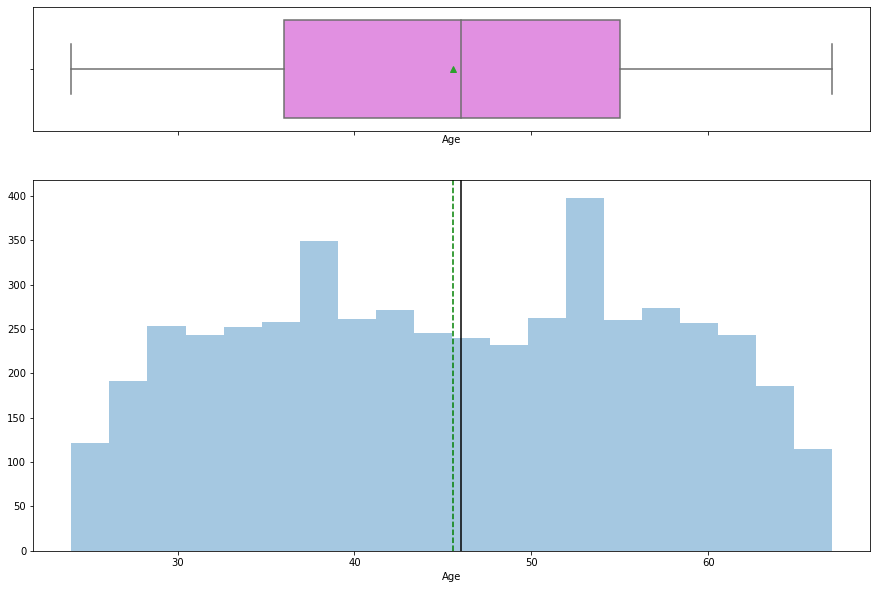

In [37]:
histogram_boxplot(data["Age"])

- Data has several peaks.
- From the boxplot doesn't show outliers.
- Q3 (75%) is 55 y.o
- Median and mean are about the same 45 y.o
- Age range of the population runs from 23 to 67 y.o

#### Experience

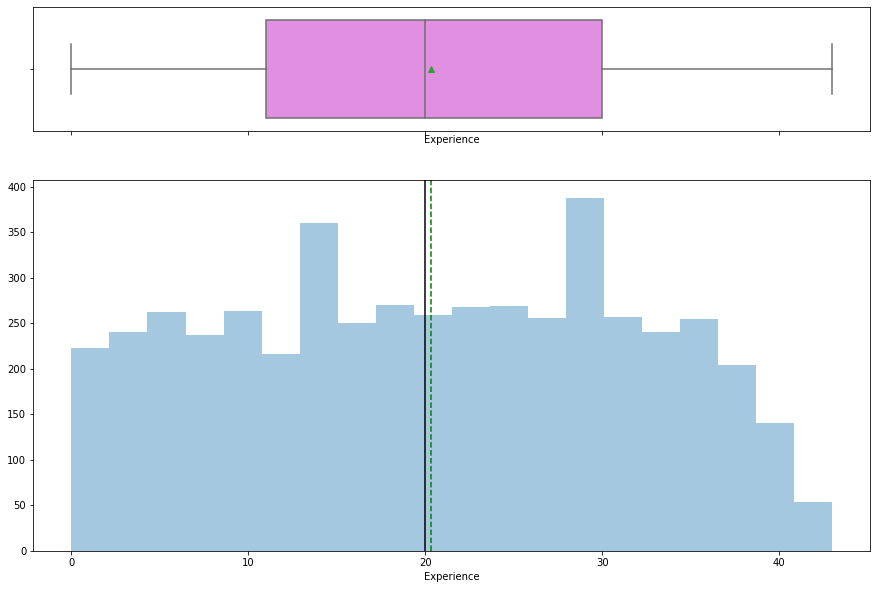

In [38]:
histogram_boxplot(data["Experience"])

- Data has several peaks. and also the Experience shows the same behavior as the age which those are suggesting, Age and experience are highly correlated. 
- From the boxplot doesn't show outliers.
- Q3 (75%) is 30 y.o
- Median and mean are about the same 20 y.o
- Age range of the population runs from -3 to 43 years. 

#### Income

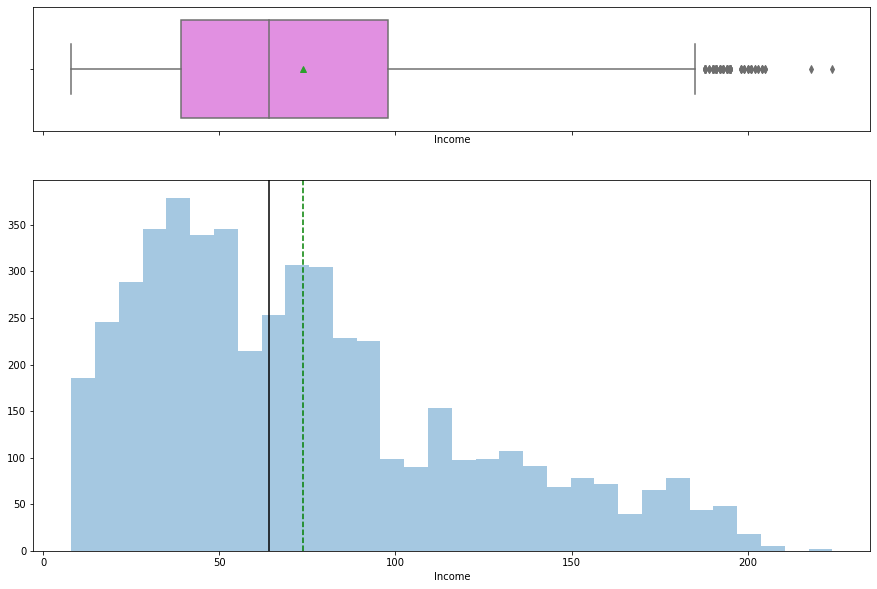

In [39]:
histogram_boxplot(data["Income"])

- The distribution of Income is right-skewed.
- From the boxplot shows outliers.
- 75% of the population earns less than $75K a year

#### CCAvg

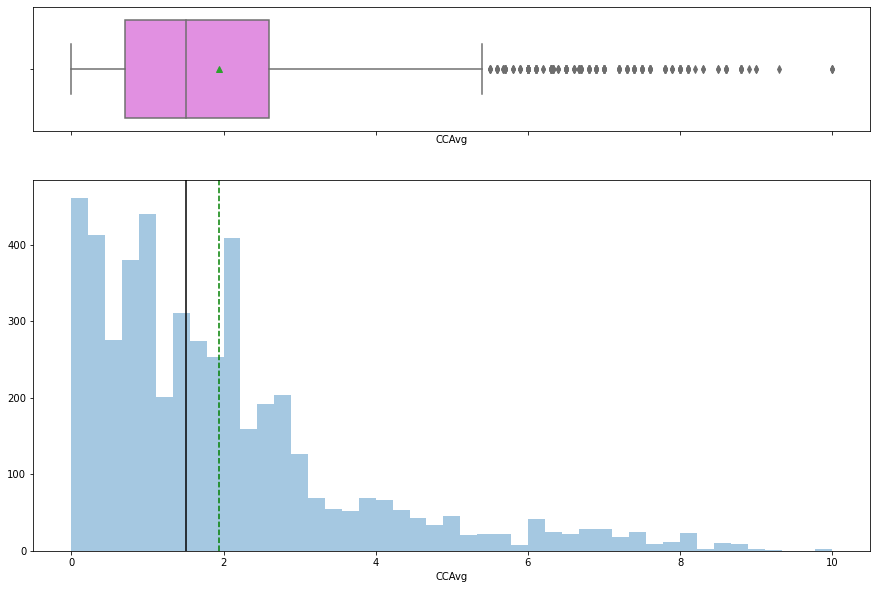

In [40]:
histogram_boxplot(data["CCAvg"])

- The distribution of CCAvg is right-skewed.
- There are outliers in this variable.
- On average the CCAvg is $1.93K.

#### Mortgage

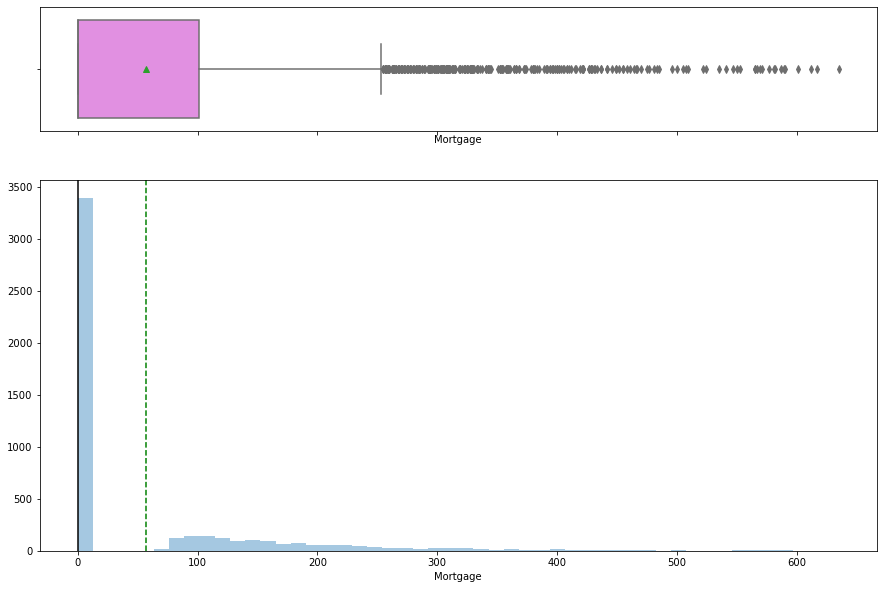

In [41]:
histogram_boxplot(data["Mortgage"])


- Most of the people on this dataset, don't own a home

#### Categorical Variables

In [42]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Education

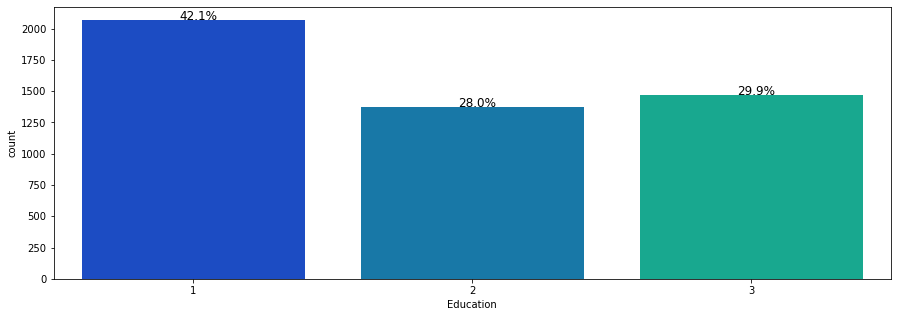

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Education"],palette='winter')
perc_on_bar(ax,data["Education"])

- 42% of the population has a Level 1 (Undergraduated) of education.

#### Family

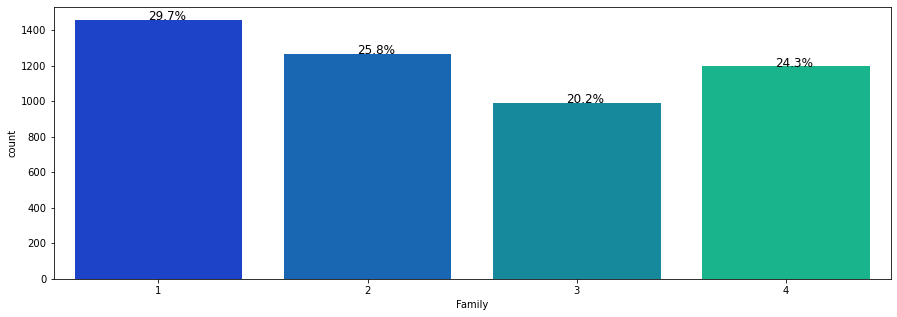

In [44]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Family"],palette='winter')
perc_on_bar(ax,data["Family"])

- 29% of the population just has a size of one family member

#### Region

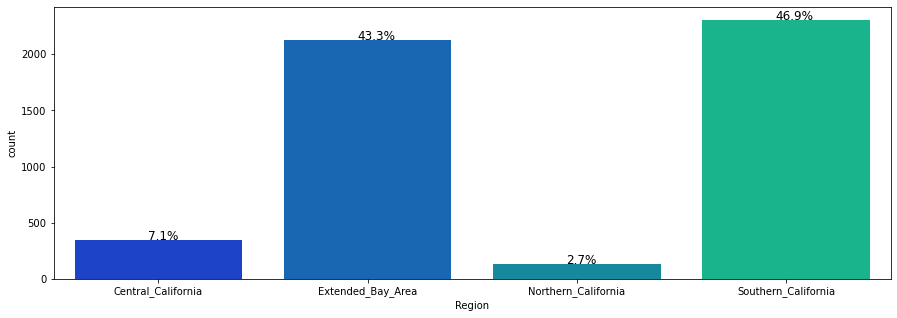

In [45]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Region"],palette='winter')
perc_on_bar(ax,data["Region"])

- The majority of the population are concetrated in Southern California and Extended Bay Area

#### Personal Loan

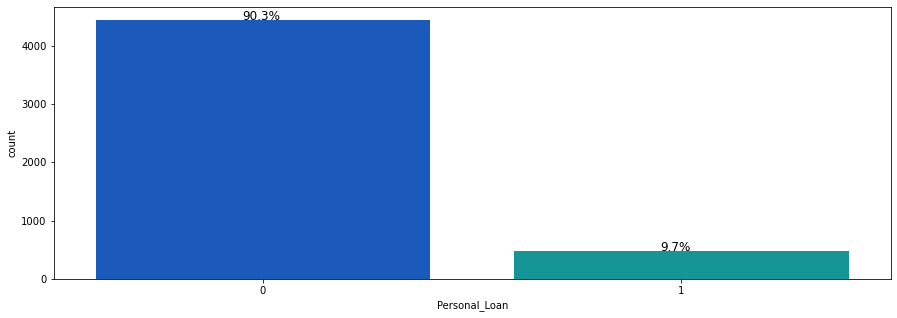

In [46]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Personal_Loan"],palette='winter')
perc_on_bar(ax,data["Personal_Loan"])

- 9.7% of the population has success is accepting a Personal Loan

#### Securities Account

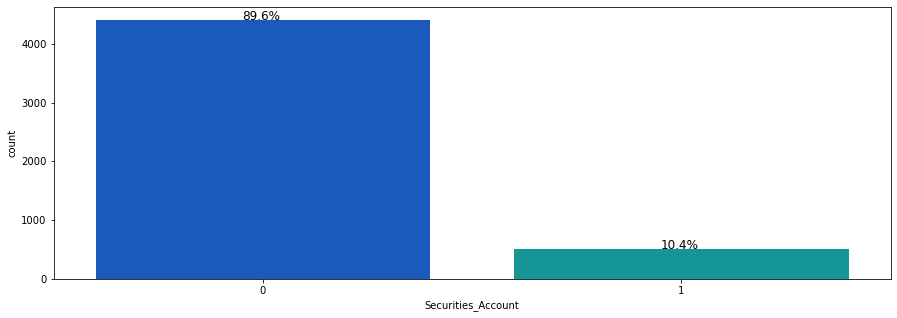

In [47]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Securities_Account"],palette='winter')
perc_on_bar(ax,data["Securities_Account"])

- 10.4% of the customers holds a securities account.

#### CD Account

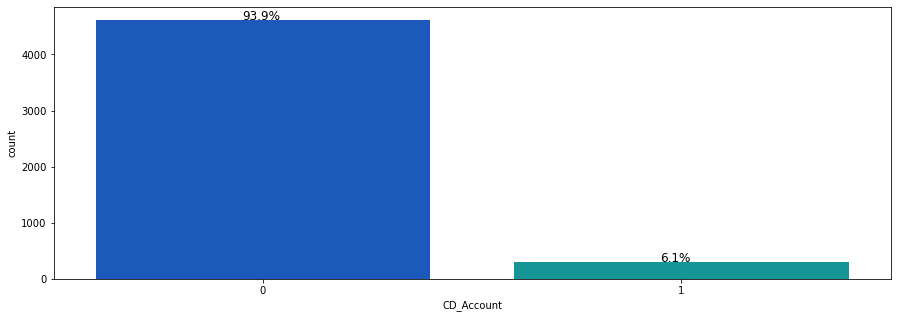

In [48]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CD_Account"],palette='winter')
perc_on_bar(ax,data["CD_Account"])

- 6.1% of the customers hold a certificate of deposit accounts.

#### Online

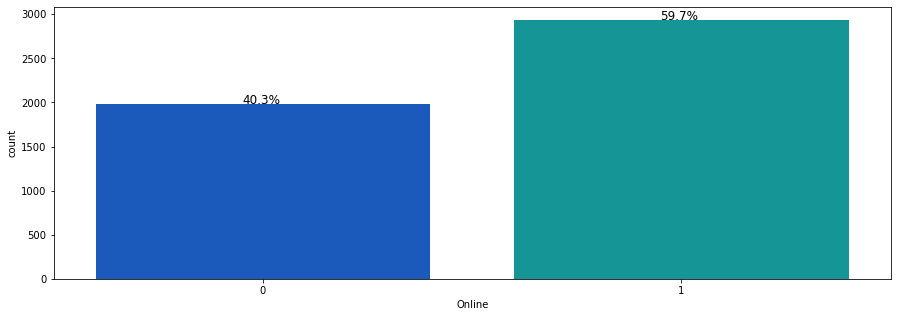

In [49]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Online"],palette='winter')
perc_on_bar(ax,data["Online"])

- 59.7% of customers are confortable using the bank online facilities.

#### Credit Card

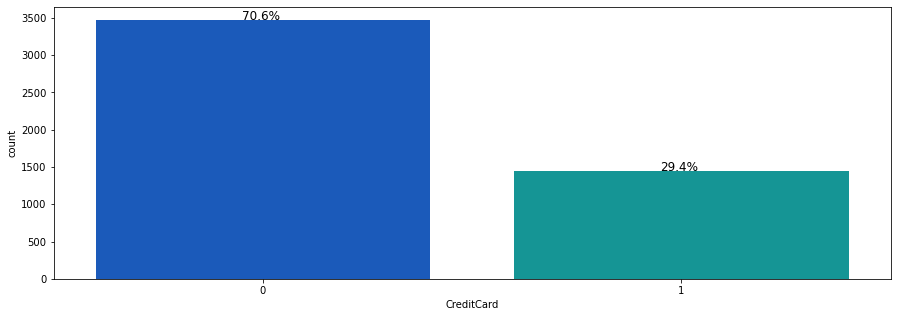

In [50]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CreditCard"],palette='winter')
perc_on_bar(ax,data["CreditCard"])

- 29.4% of the bank customers have at least a credit card with another bank.

## Bivariate Analysis

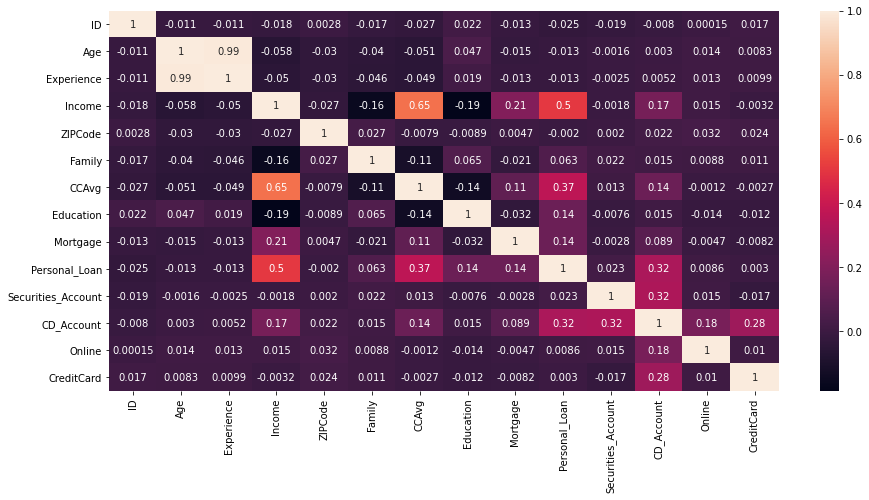

In [51]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

- There's a very strong correlation between Age and Experice at 0.99 that implies multicollinearity for the model.
- Also the is a correlation between Income and CAvg(0.65)

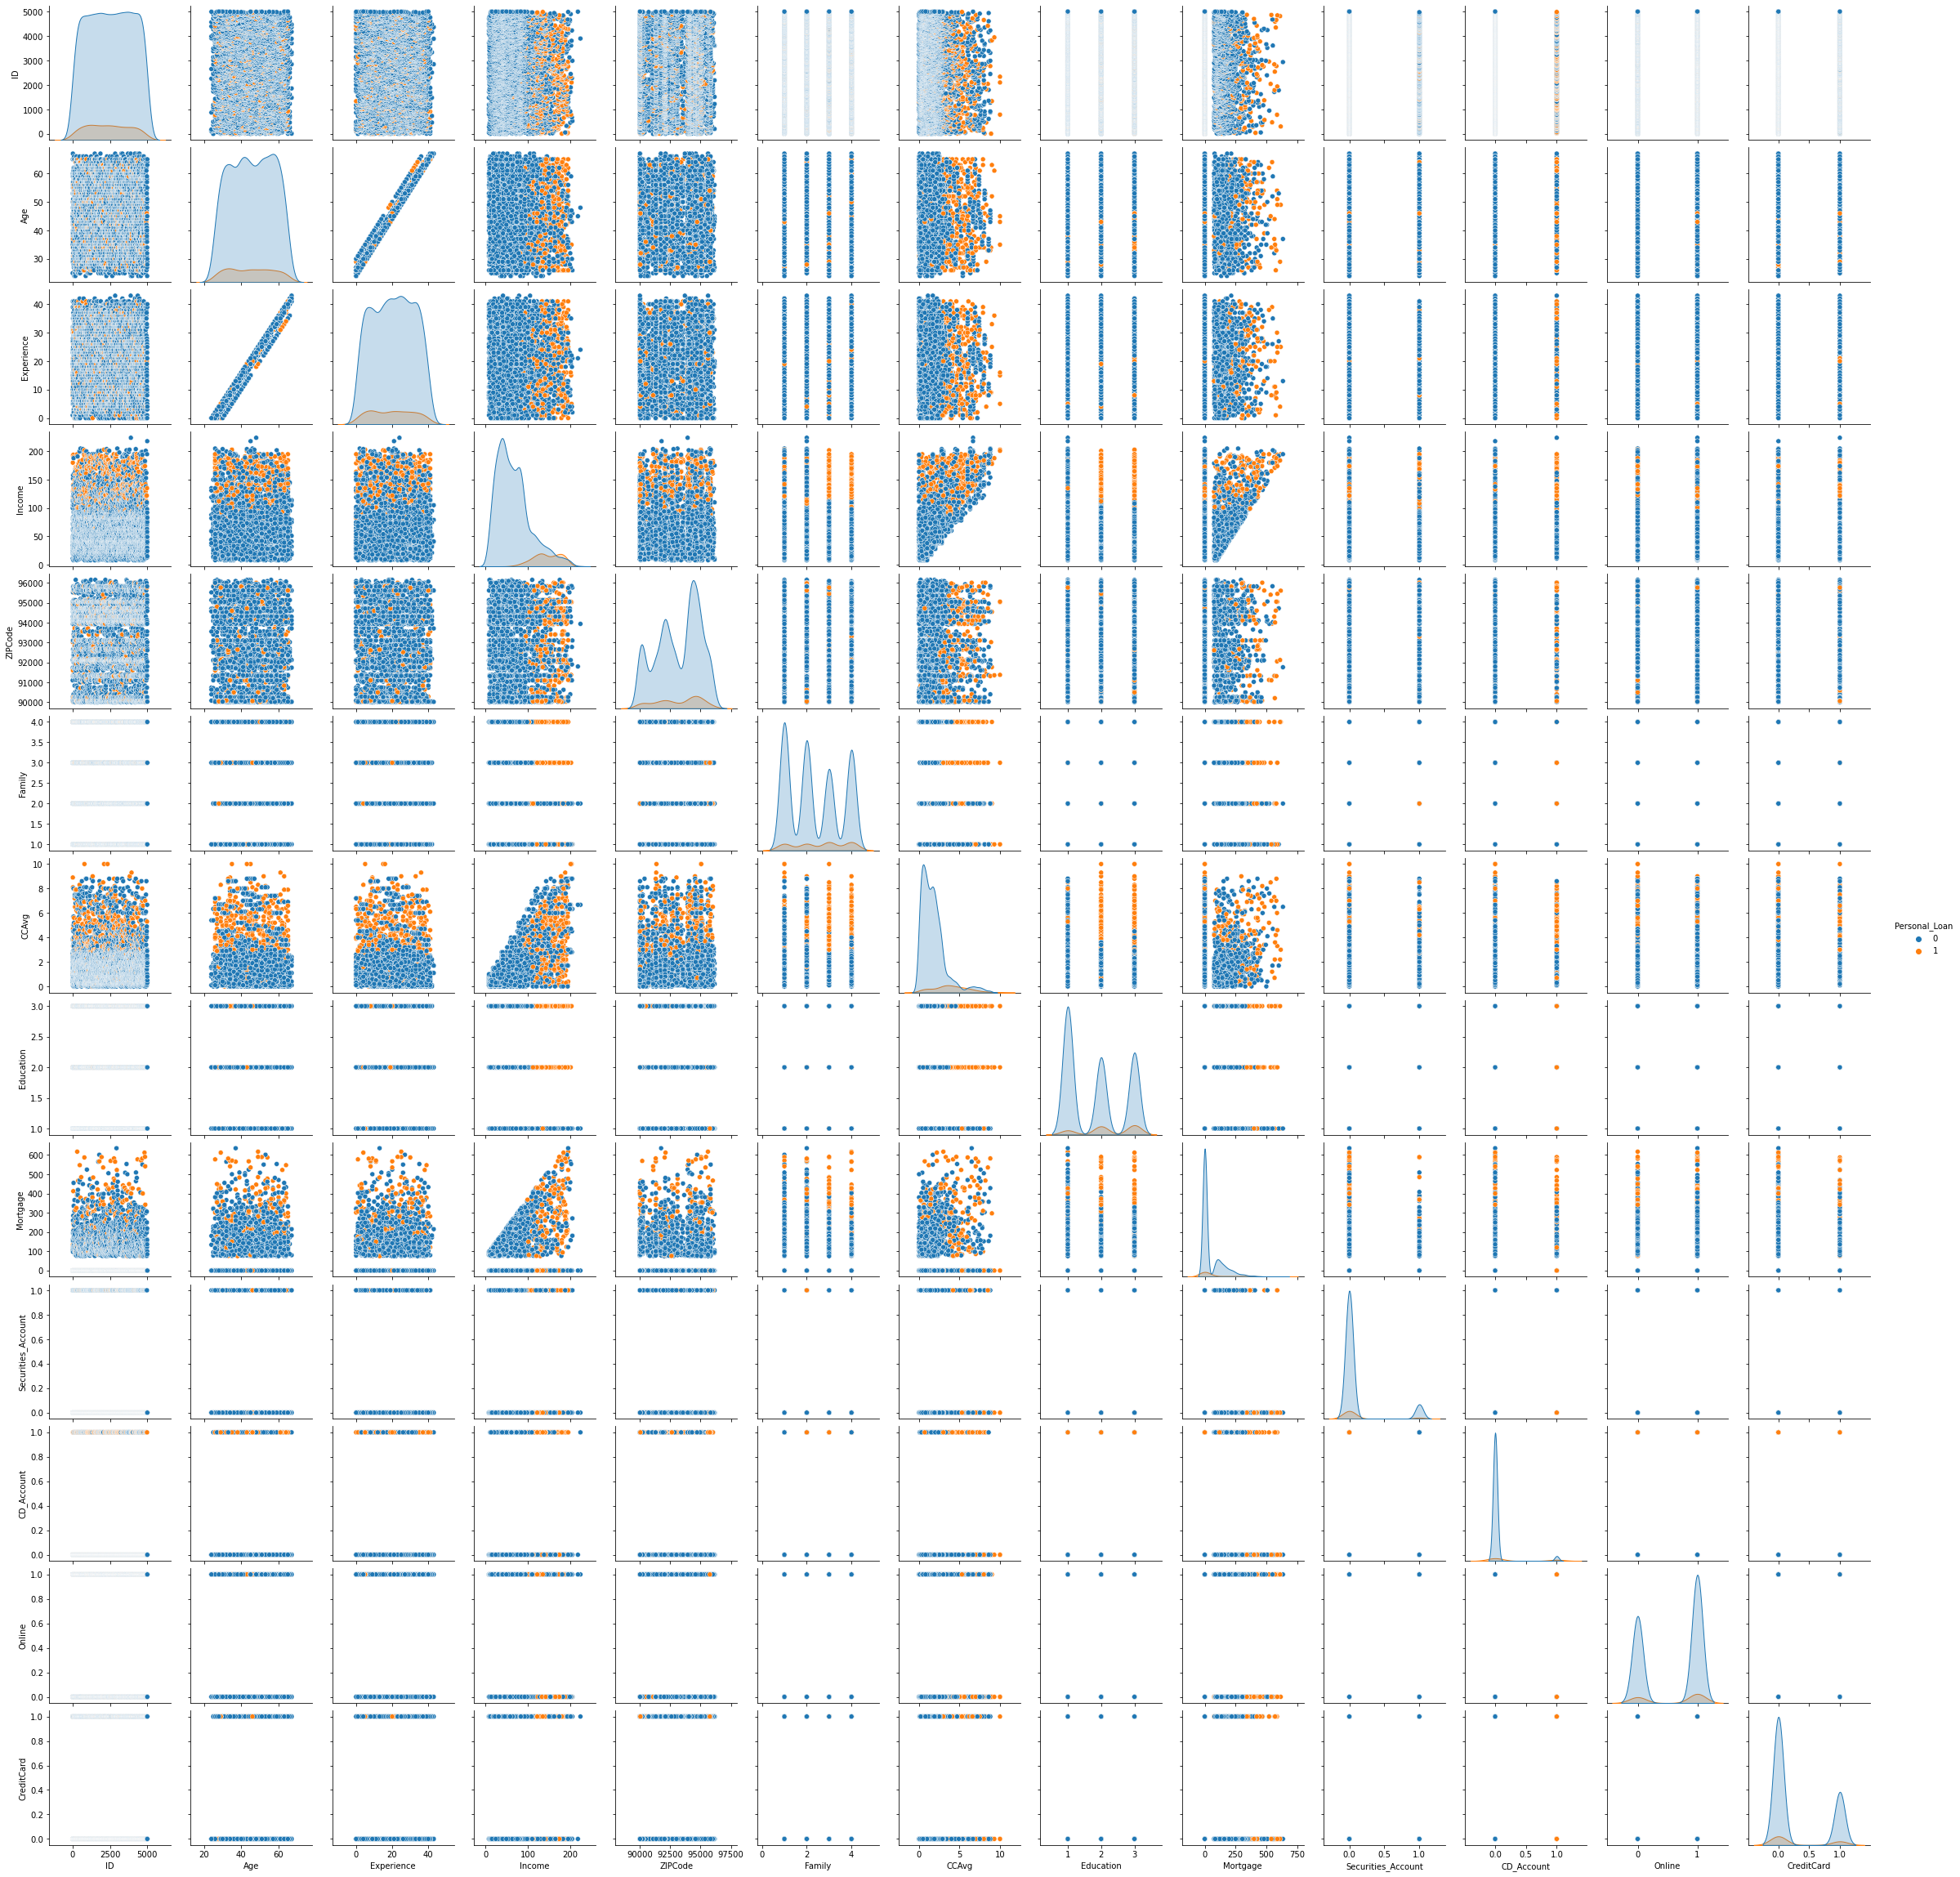

In [52]:
sns.pairplot(data=data,hue="Personal_Loan",)
plt.show()

- We can see varying distributions in variables for Personal_Loan, we should investigate it further.
- Again, Experience and Age are highly correlated

### Bivariate Analysis

In [53]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Region v.s Personal Loan

Personal_Loan           0    1   All
Region                              
Central_California    316   33   349
Extended_Bay_Area    1923  206  2129
Northern_California   121   11   132
Southern_California  2078  227  2305
All                  4438  477  4915
------------------------------------------------------------------------------------------------------------------------


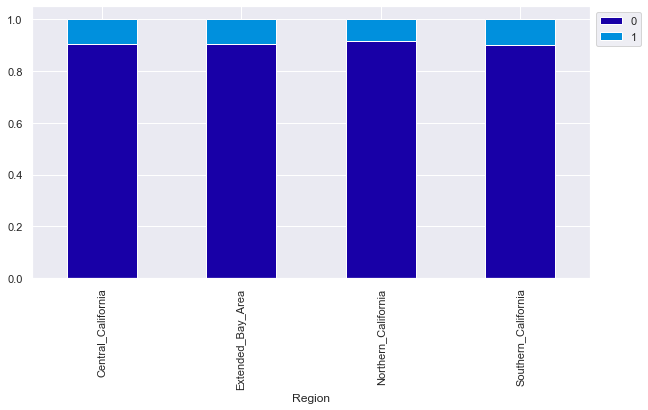

In [54]:
stacked_plot(data['Region'])

- Southern California is the region that contributes the most on the people accepting the personal loan thru the campaign(9.74%). This region has the most people listed on this data set.
- The region with the least success in the personal loan campaign is The Northern one with 8.33%

#### Region v.s Personal Loan

Personal_Loan     0    1   All
Education                     
1              1977   93  2070
2              1194  180  1374
3              1267  204  1471
All            4438  477  4915
------------------------------------------------------------------------------------------------------------------------


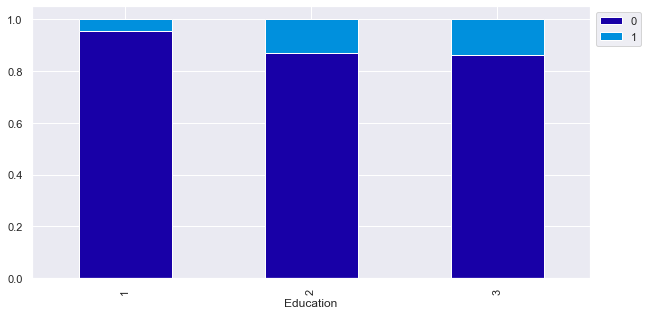

In [55]:
stacked_plot(data['Education'])

- The campaign has more success for people with level of education 3 and 2 than 1.

#### Family v.s Personal Loan

Personal_Loan     0    1   All
Family                        
1              1352  106  1458
2              1162  106  1268
3               861  132   993
4              1063  133  1196
All            4438  477  4915
------------------------------------------------------------------------------------------------------------------------


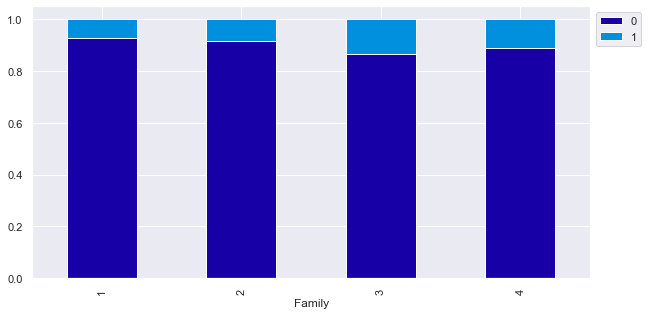

In [56]:
stacked_plot(data['Family'])

- The campaign for personal loan has a better succes for people with house hold of 3 and four people.

#### Securities Account v.s Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
0                   3986  417  4403
1                    452   60   512
All                 4438  477  4915
------------------------------------------------------------------------------------------------------------------------


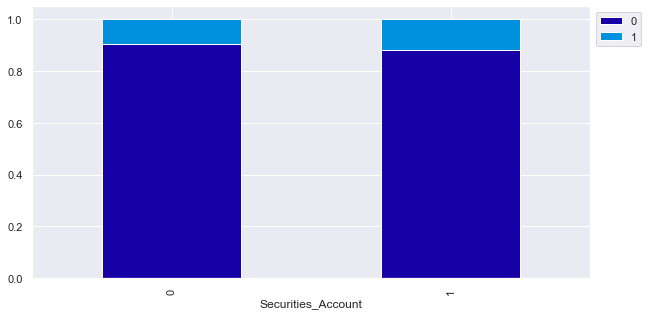

In [57]:
stacked_plot(data['Securities_Account'])

- The campaingn has better success for people that handles Securities account than the one who don't

#### CD_Account v.s Personal Loan

Personal_Loan     0    1   All
CD_Account                    
0              4276  337  4613
1               162  140   302
All            4438  477  4915
------------------------------------------------------------------------------------------------------------------------


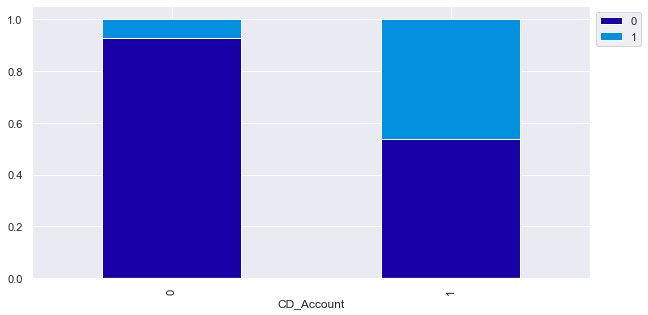

In [58]:
stacked_plot(data['CD_Account'])

- The campaing has a great succes on a 46% over people that handles a CD Account, However this is just the 6.1% of the population

#### Online v.s Personal Loan

Personal_Loan     0    1   All
Online                        
0              1794  186  1980
1              2644  291  2935
All            4438  477  4915
------------------------------------------------------------------------------------------------------------------------


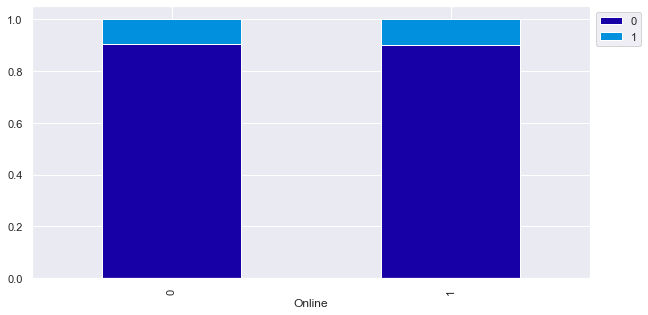

In [59]:
stacked_plot(data['Online'])

- There's no much difference on the campaign success, from people that use the online banking facilities, versus the ones, who don't use them.

#### Credit Card v.s Personal Loan

Personal_Loan     0    1   All
CreditCard                    
0              3137  335  3472
1              1301  142  1443
All            4438  477  4915
------------------------------------------------------------------------------------------------------------------------


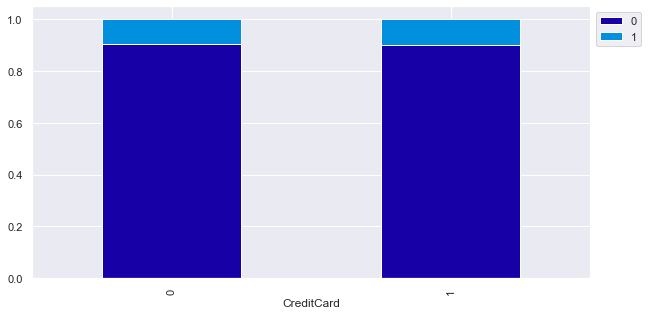

In [60]:
stacked_plot(data['CreditCard'])

- There's no much difference on the campaign success, from people that use a credit card from All Life Bank, versus the ones, who don't use them.

### Multivariate Analysis

#### Age, Experience, Income, CCAvg, Mortgage v.s Personal Loan

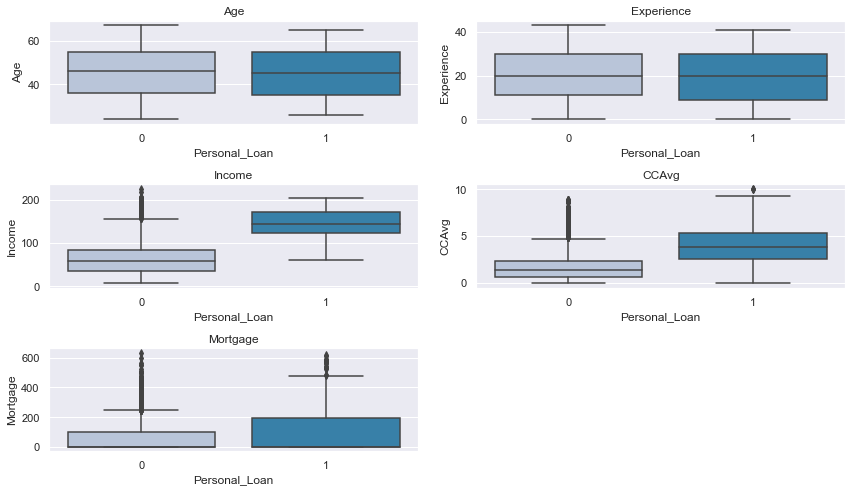

In [61]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- From The Age/Experience, people that tend to get personal Loan, have somehow work experience.
- Also, the people that accept a personal loan tend to have a higher income, with an average income of 150K.
- People that accept the loan tend to spend more mone on credit cards per month, aprox average 3.5K/month.
- 75% of the people that have a Personal Loan owns a house with a value of less than 200K 

#### Age, Experience, Income, CCAvg, Mortgage v.s CD Account v.s Personal Loan

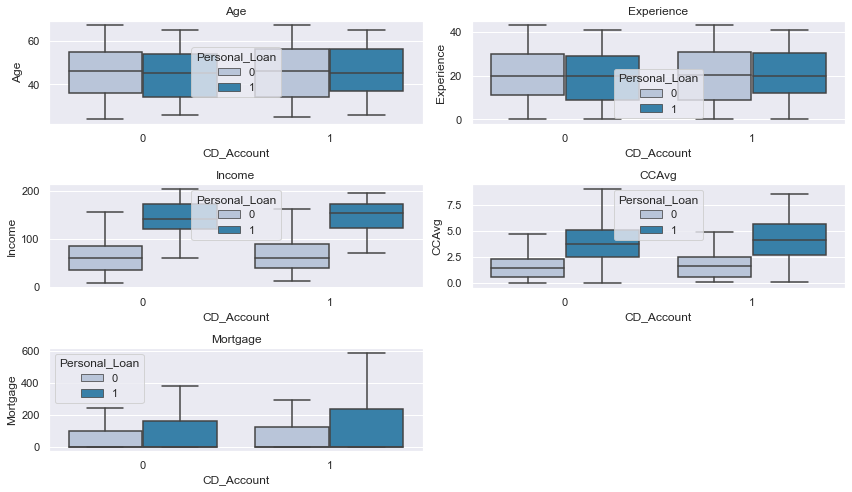

In [62]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["CD_Account"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Customers with the highest mortgage on this dataset, tend to have a Certified of deposit Accounts, accepts a loan.

#### Age, Experience, Income, CCAvg, Mortgage v.s Securities Account v.s Personal Loan

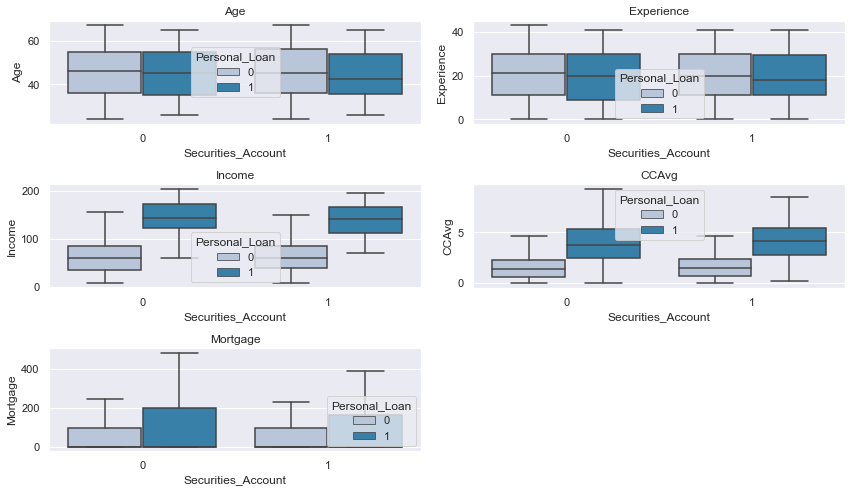

In [63]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Securities_Account"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- People with the highest mortgage, that accept a loan, tend not to have a security account.

#### Age, Experience, Income, CCAvg, Mortgage v.s Online v.s Personal Loan

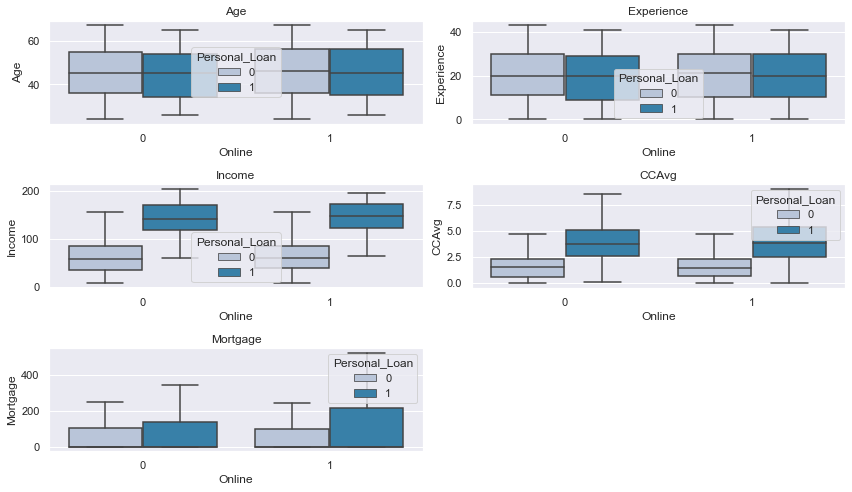

In [64]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Online"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- People with the highest mortgage that accept personal loan tends to be more confortable using the online banking facilities.

#### Age, Experience, Income, CCAvg, Mortgage v.s Credit Card v.s Personal Loan

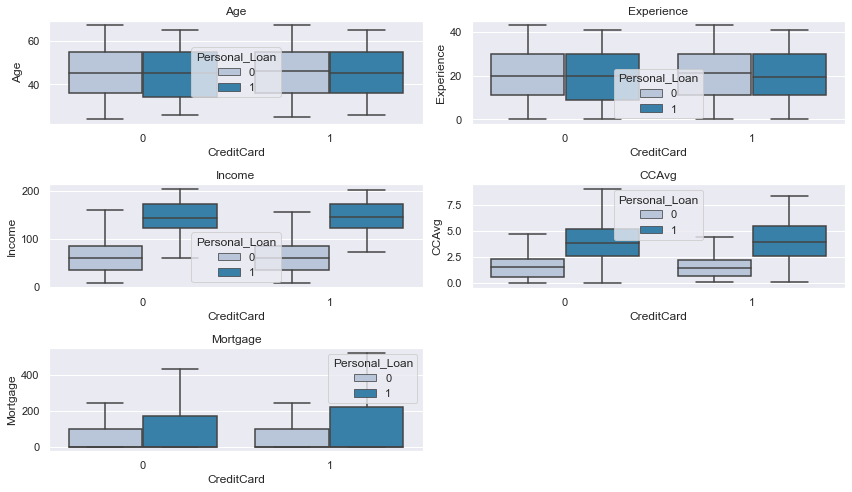

In [65]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["CreditCard"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Customers that have a credit card with other banks and have a personal loan, tend to have a higher mortgage

#### Age, Experience, Income, CCAvg, Mortgage v.s Education v.s Personal Loan

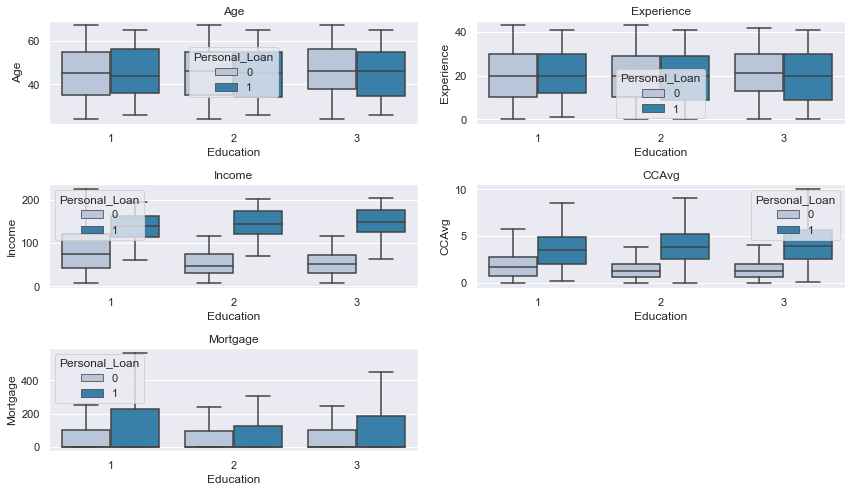

In [66]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Education"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- People from level of Education 1 tend to make more income a year and most likely the people that accept personal loan.
- Also, people from level 1 with highest mortgage tend to get a personal loan. Regardless the level, People with a the higher home value on each level, tend to get a Personal Loan.
- People with level of education 3, that accept the loan tend to expend more money on Average on credit cards.

#### Age, Experience, Income, CCAvg, Mortgage v.s Family v.s Personal Loan

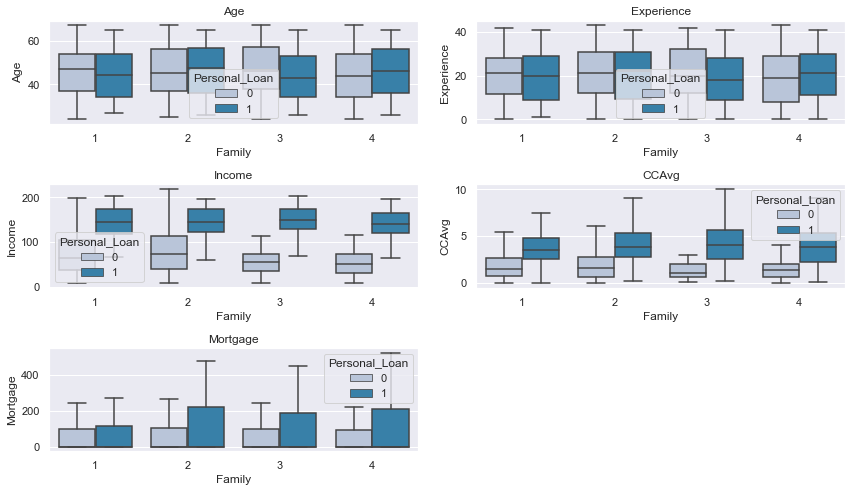

In [67]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Family"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- People with a family size of 2 /3/4 tend to spend more money in credit cards monthly and accept a personal loan.
- People with the highest mortgage and family size 2/3/4 tend to get a Personal Loan

#### Age, Experience, Income, CCAvg, Mortgage v.s Region v.s Personal Loan

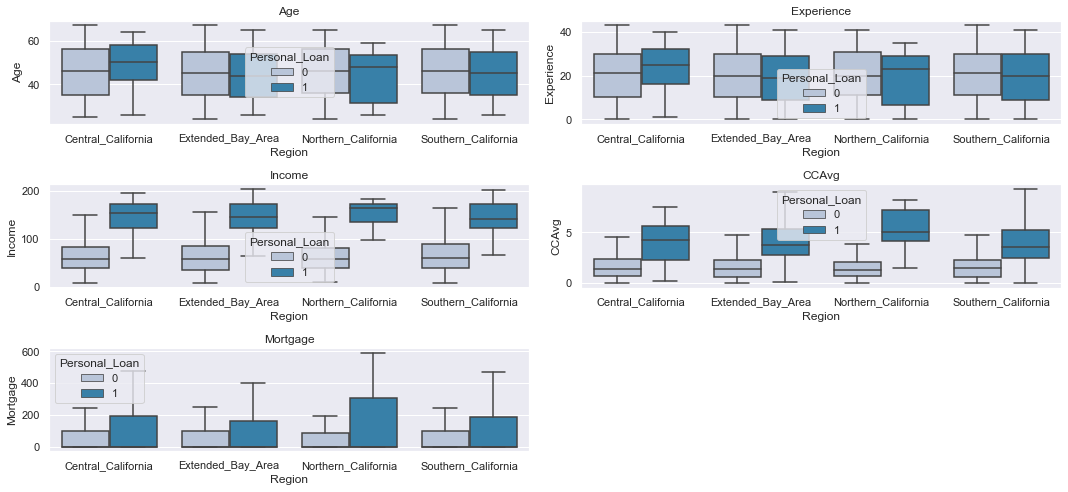

In [68]:
cols = data[['Age','Experience','Income','CCAvg','Mortgage']].columns.tolist()
plt.figure(figsize=(15,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Region"],data[variable],hue=data['Personal_Loan'],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- The people from Central and Northern region, tend to be on average, about 50 years old that accept the loan. While the Extended bay area and the Southern region, which are the most popular regionson our dataset, the people that accept the loan are on average, about 45 years old.
- Northern California which is the least popular region shows the highest income in the region from the people that gets the personal loan.
- People that expend the most money on credit cards monthly and gets a Personal Loan, are located in Central and Northern California.
- People with the highest mortgage value that accept the credit are located in the Northern California Region

##### More Analysis per Region

In [69]:
def stacked_plot2(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Region'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Region'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Region      Central_California  Extended_Bay_Area  Northern_California  \
CD_Account                                                               
0                          327               1983                  125   
1                           22                146                    7   
All                        349               2129                  132   

Region      Southern_California   All  
CD_Account                             
0                          2178  4613  
1                           127   302  
All                        2305  4915  
------------------------------------------------------------------------------------------------------------------------


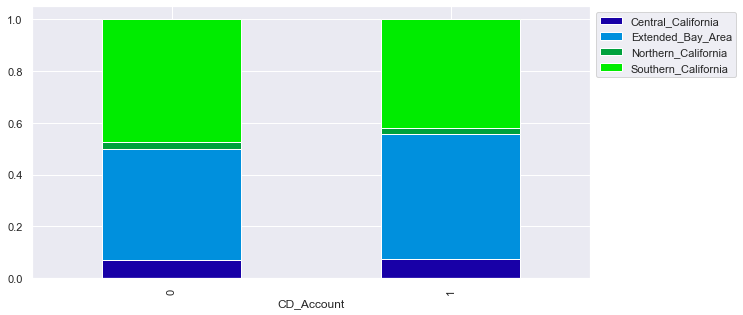

In [70]:
stacked_plot2(data['CD_Account'])

- After campaing, people with CD Accounts, seem to be receptive to get a personal loan, Regions of Central and Extended Bay have more room of improvement on campaign performance since the rate of CD Account is bigger(1% more) than Northern and Southern region.

Region  Central_California  Extended_Bay_Area  Northern_California  \
Family                                                               
1                      121                607                   33   
2                       82                541                   39   
3                       75                437                   26   
4                       71                544                   34   
All                    349               2129                  132   

Region  Southern_California   All  
Family                             
1                       697  1458  
2                       606  1268  
3                       455   993  
4                       547  1196  
All                    2305  4915  
------------------------------------------------------------------------------------------------------------------------


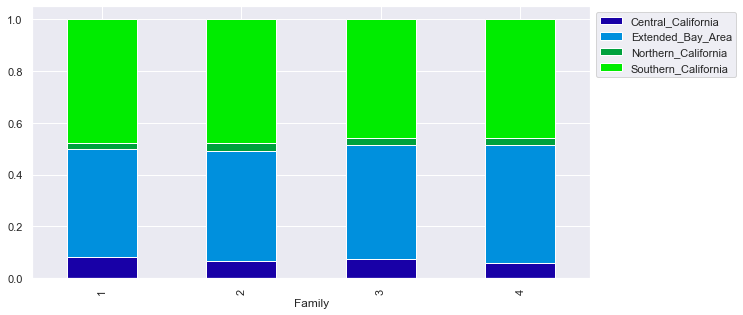

In [71]:
stacked_plot2(data['Family'])

- Since families with 3 and 4 family member are most likely open to get a Personal loan, the regions, with more probabilities to be opened to listen about the campaing and get accepted would be extended bay Area and Northern California

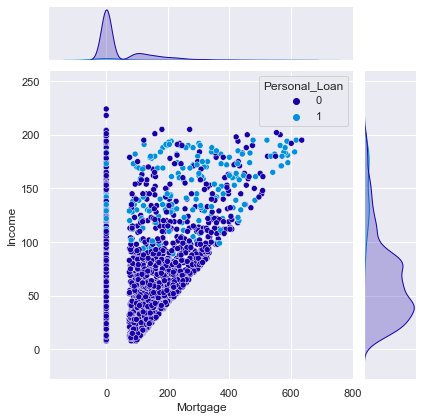

In [72]:
sns.jointplot(
    data=data,
    x="Mortgage", y="Income", hue="Personal_Loan",)

- This plot is showing that customers that make less than approx 95K a year won't accept the loan regardles if they own a house or not.

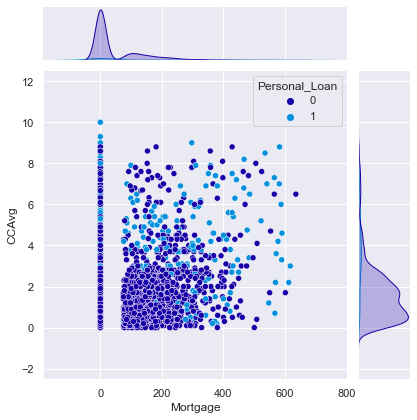

In [73]:
sns.jointplot(
    data=data,
    x="Mortgage", y="CCAvg", hue="Personal_Loan",)

- Mostlikely people that has a mortgage value below 240K and expend less than 3K won't accept to get a personal loan
- There's more chance that people with higher Mortgage value home and more than 2K spending on credit cards would accept the credit card offer

## Summary of EDA

### Data Description:

- Dependent variable is Personal_Loan.
- Except for Region and County that are categorical, the others are numerical. However, Education is classified by 3 levels, - - Securities_Account, CD_Account, Online, CreditCard and Personal_Loan are weather 0, for No, 1 for yes.
- There are no missing values in the data.

### Data Cleaning:

- 34 Zipcodes were not able to be assigned to County/Region, therefore, they were dropped.
- All the Counties belongs to California State so the territory was divided in four regions based on their geographical location.
- Variable Experience had negative values, with very random data so that data was dropped.
- Made sure that customers with CCAvg equal to 0 where on CreditCard 0 as well, since there not cc usage at all.

### Observations from EDA:
- Age: Most of the customers are around the middle age, the range is from between 24-67 years old.
- Experience: is highly correlated to the customers age and it come from 0 to 43 years of experience.
- Income: As the income is higher than 95k, avg of 150K are most likely willing to get a Personal_Loan
- Region: The majority of the population are concetrated in Southern California and Extended Bay Area, however, I find a great potential on the Northern California region, where I find population with high income, active and high Credit Card usage and high home value.
- Family: Family sizes with more than 2 people tend to be more receptive to get a personal loan.
- CCAvg: customers that spend more than 3K a month in cc tend to be more receptive to get personal loans.
- Education: in general, customers with level of education 3 tend to spend more money in credit cards, and receptive to get a loan/
- Mortgage: as more expensive the house is, people are more receptive to get personal loans.
- Personal_Loan: the campaign has 9.7% of success on this population.
- Securities_Account: People with the highest mortgage, highiest income and high cc expenses that accept to get the long tend not to get a Security account.
- CD_Account: After campaing, people with CD Accounts, seem to be receptive to get a personal loan, Regions of Central and Extended Bay have more room of improvement on campaign performance since the rate of CD Account is bigger(1% more) than Northern and Southern region.
- Online: People with the highest mortgage that accept personal loan tends to be more confortable using the online banking facilities.
- CreditCard: Customers that have a credit card with other banks and have a personal loan, tend to have a higher mortgage

### Actions for data pre-processing:

- Many variables have outliers that need to be treated.
- ID, ZIPCode and County needs to be dropped.
- Convert Education, Securities Account, CD_Account, Online, Credit Card and Personal Loan to categories.


### Data Preparation

In [74]:

data = data.drop(['ID','ZIPCode','County'],axis=1) 

In [75]:
data['Education'] = data['Education'].astype('category')
data['Securities_Account'] = data['Securities_Account'].astype('category')
data['Family']=data['Family'].astype('category')
data['CD_Account'] = data['CD_Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')
data['Personal_Loan'] = data['Personal_Loan'].astype('category')

### Ouliers detection using boxplot

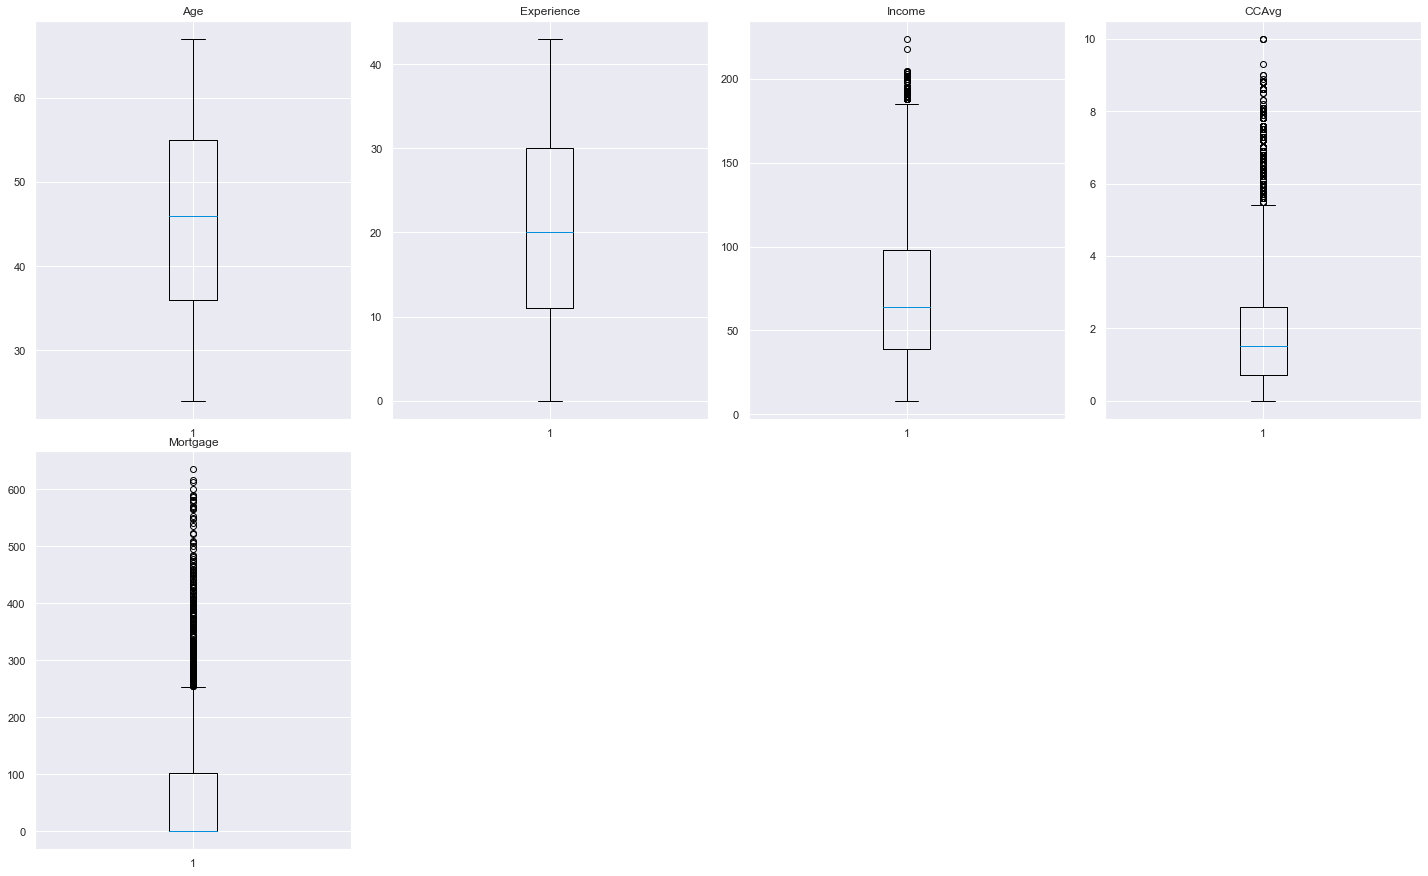

In [76]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

- Income, CCAvg and Mortgage have upper outliers.

### Treating Outliners

In [77]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [78]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

# treating outliers
numerical_col = [ele for ele in numerical_col] 
data = treat_outliers_all(data,numerical_col)

## Split Data

In [79]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = data.drop([*kwargs], axis=1)
    Y = data['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

  #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [80]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

### Building the Model

### Model evaluation Criterion

### Model can make wrong desicion as:

1. Predicting the customer gets the Personal loan but actually doesn't
2. Predicting the customer doesn't get the loan but actually, gets it.

### How to check that?

- Since the data is imbalanced f1_score should be maximazed, the greater the f1_score is, higher are the chances of indentifying both classes correctly. 

### Logistic Regression code for statsmodels library)

In [81]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

### Logistic Regression code for Sklearn library

In [82]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [83]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - NO","Actual - YES"]],
                  columns = [i for i in ['Predicted - NO','Predicted - YES']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression (with Sklearn library)

In [84]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.961046511627907
Accuracy on test set :  0.9647457627118644
Recall on training set :  0.7014492753623188
Recall on test set :  0.6515151515151515
Precision on training set :  0.8864468864468864
Precision on test set :  0.9347826086956522
F1 on training set :  0.7831715210355986
F1 on test set :  0.7678571428571428


In [85]:
lr.predict_proba(X_test)[:-1]

array([[0.1960412 , 0.8039588 ],
       [0.90055646, 0.09944354],
       [0.9955786 , 0.0044214 ],
       ...,
       [0.92102117, 0.07897883],
       [0.99658879, 0.00341121],
       [0.91582282, 0.08417718]])

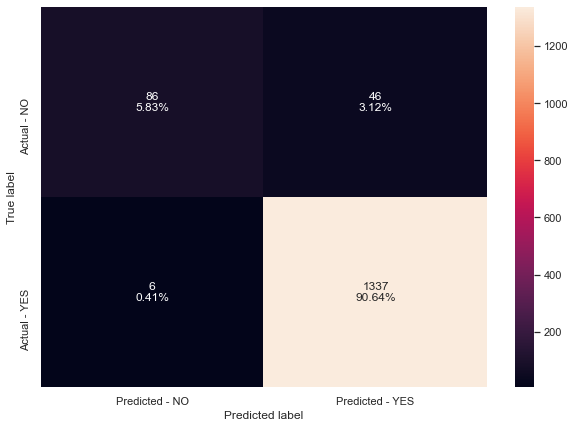

In [86]:
make_confusion_matrix(lr,X_test,y_test,labels=[1,0])

- We have build a logistic regression model which show similar performance in train and test but no the expected result for Recall, which is too low.

- We will now perform logistic regression using statsmodels.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

## Logistic Regression (with statsmodels library)

In [87]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.112680
         Iterations 10
Accuracy on training set :  0.9642441860465116
Accuracy on test set :  0.9633898305084746
Recall on training set :  0.7333333333333333
Recall on test set :  0.6590909090909091
Precision on training set :  0.8908450704225352
Precision on test set :  0.90625
F1 on training set :  0.8044515103338633
F1 on test set :  0.763157894736842


- With this model based in probability, we were able to improve the recall but still have more room to check for better results

In [88]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3440
Model:                          Logit   Df Residuals:                     3422
Method:                           MLE   Df Model:                           17
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.6541
Time:                        22:23:47   Log-Likelihood:                -387.62
converged:                       True   LL-Null:                       -1120.5
Covariance Type:            nonrobust   LLR p-value:                1.166e-301
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -12.5910      2.294     -5.487      0.000     -17.088      -8.094
Age                           -0.0603      0.084     -0.715      0.475      -0.226       0.105
Experience                     0.0714      0.084      0.850      0.396      -0.093       0.236
Income                         0.0638      0.004     16.497      0.000       0.056       0.071
CCAvg                          0.3687      0.072      5.095      0.000       0.227       0.510
Mortgage                       0.0011      0.001      1.064      0.287      -0.001       0.003
Region_Extended_Bay_Area       0.6513      0.456      1.429      0.153      -0.242       1.545
Region_Northern_California     0.6272      0.739      0.849      0.396      -0.821       2.076
Region_Southern_California     0.6036      0.451      1.338      0.181      -0.280       1.488
Family_2                      -0.4138      0.279     -1.486      0.137      -0.960       0.132
Family_3                       1.9696      0.294      6.695      0.000       1.393       2.546
Family_4                       1.3610      0.287      4.740      0.000       0.798       1.924
Education_2                    4.1399      0.343     12.061      0.000       3.467       4.813
Education_3                    4.3127      0.340     12.668      0.000       3.645       4.980
Securities_Account_1          -0.8240      0.364     -2.262      0.024      -1.538      -0.110
CD_Account_1                   3.4650      0.400      8.671      0.000       2.682       4.248
Online_1                      -0.6675      0.203     -3.290      0.001      -1.065      -0.270
CreditCard_1                  -0.8935      0.260     -3.437      0.001      -1.403      -0.384
==============================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- From the P-value, we can see a highly multicolinearity between Age and Experience.
- Not very big significance on Mortgage and the regions.


## Multicollinearity

In [89]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()
X_test_num = X_test.astype(float).copy()

In [90]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                         482.909888
Age                            91.759727
Experience                     91.576078
Income                          1.809011
CCAvg                           1.704926
Mortgage                        1.022441
Region_Extended_Bay_Area        4.010072
Region_Northern_California      1.354055
Region_Southern_California      4.017824
Family_2                        1.395163
Family_3                        1.388110
Family_4                        1.418346
Education_2                     1.295876
Education_3                     1.323597
Securities_Account_1            1.128794
CD_Account_1                    1.336308
Online_1                        1.042352
CreditCard_1                    1.121638
dtype: float64



#### Eliminating Experience

In [91]:
X_train_num1 = X_train_num.drop('Experience',axis=1)
X_test_num1= X_test_num.drop('Experience',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_num1.values,i) for i in range(X_train_num1.shape[1])],index=X_train_num1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                         42.427019
Age                            1.017656
Income                         1.802869
CCAvg                          1.699639
Mortgage                       1.022411
Region_Extended_Bay_Area       4.010059
Region_Northern_California     1.353694
Region_Southern_California     4.017814
Family_2                       1.395136
Family_3                       1.381869
Family_4                       1.418221
Education_2                    1.276662
Education_3                    1.244016
Securities_Account_1           1.128225
CD_Account_1                   1.334712
Online_1                       1.042321
CreditCard_1                   1.121252
dtype: float64



- This model provides better VIF results and no signs of multicollinearity.

In [92]:
X_train,X_test,y_train,y_test = split('Personal_Loan')

In [93]:
X_train.drop(['Experience'],axis=1,inplace=True)
X_test.drop(['Experience'],axis=1,inplace=True)

In [94]:
logit1 = sm.Logit(y_train, X_train.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,X_train,X_test,y_train,y_test)


Optimization terminated successfully.
         Current function value: 0.112787
         Iterations 10
Accuracy on training set :  0.963953488372093
Accuracy on test set :  0.9640677966101695
Recall on training set :  0.7333333333333333
Recall on test set :  0.6666666666666666
Precision on training set :  0.887719298245614
Precision on test set :  0.9072164948453608
F1 on training set :  0.8031746031746031
F1 on test set :  0.7685589519650655


- There's not any significant changes.
- Accurancy didn't drop
- We go with lg1 because accuracy didn't drop and theres no multicollinearity in the model

In [95]:
lg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3440
Model:                          Logit   Df Residuals:                     3423
Method:                           MLE   Df Model:                           16
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.6537
Time:                        22:23:47   Log-Likelihood:                -387.99
converged:                       True   LL-Null:                       -1120.5
Covariance Type:            nonrobust   LLR p-value:                1.727e-302
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -14.3748      0.961    -14.954      0.000     -16.259     -12.491
Age                            0.0110      0.009      1.276      0.202      -0.006       0.028
Income                         0.0641      0.004     16.588      0.000       0.057       0.072
CCAvg                          0.3663      0.072      5.075      0.000       0.225       0.508
Mortgage                       0.0011      0.001      1.036      0.300      -0.001       0.003
Region_Extended_Bay_Area       0.6401      0.454      1.409      0.159      -0.250       1.530
Region_Northern_California     0.6408      0.736      0.871      0.384      -0.802       2.083
Region_Southern_California     0.5923      0.449      1.318      0.187      -0.288       1.473
Family_2                      -0.4102      0.279     -1.472      0.141      -0.956       0.136
Family_3                       1.9693      0.294      6.698      0.000       1.393       2.546
Family_4                       1.3624      0.287      4.743      0.000       0.799       1.925
Education_2                    4.1122      0.341     12.044      0.000       3.443       4.781
Education_3                    4.2720      0.337     12.683      0.000       3.612       4.932
Securities_Account_1          -0.8189      0.364     -2.251      0.024      -1.532      -0.106
CD_Account_1                   3.4755      0.399      8.714      0.000       2.694       4.257
Online_1                      -0.6657      0.203     -3.286      0.001      -1.063      -0.269
CreditCard_1                  -0.8982      0.260     -3.459      0.001      -1.407      -0.389
==============================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- Age, Mortgage and Region are not very significant
- Income, Credit Card Avg, Family 3/4, Education 2/3 and CD_Account 1 are the most important based on the P-value definition.

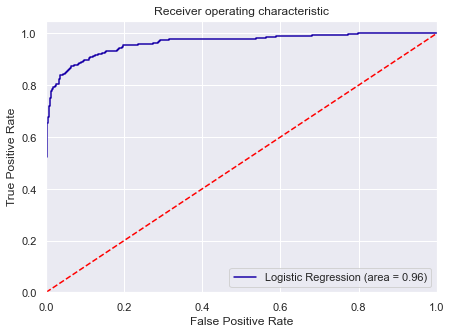

In [96]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train_num1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train_num1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- It is a good model, the more the curve is toward the left corner the better the model is.

In [97]:
print(logit_roc_auc_train)

0.9638322680339958


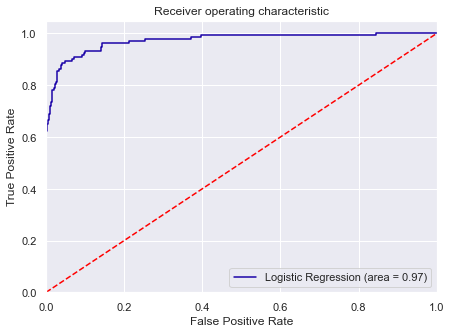

In [98]:
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(X_test_num1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test_num1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- The model performance well for the training and the test set.
- The model is not overfitting

### Converting coefficients to odds

In [99]:
odds = np.exp(lg1.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train_num1.columns, columns=['odds']).T # adding the odds to a dataframe

const       Age    Income     CCAvg  Mortgage  \
odds  5.716306e-07  1.011064  1.066176  1.442316  1.001052   

      Region_Extended_Bay_Area  Region_Northern_California  \
odds                   1.89674                    1.898077   

      Region_Southern_California  Family_2  Family_3  Family_4  Education_2  \
odds                    1.808229  0.663495  7.165552  3.905386    61.083479   

      Education_3  Securities_Account_1  CD_Account_1  Online_1  CreditCard_1  
odds    71.662151              0.440926     32.313869  0.513909      0.407295

Percentage change in odds

In [100]:
perc_change_odds = (np.exp(lg1.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe


const       Age    Income     CCAvg  Mortgage  \
change_odds% -99.999943  1.106361  6.617615  44.23161  0.105232   

              Region_Extended_Bay_Area  Region_Northern_California  \
change_odds%                 89.674046                   89.807702   

              Region_Southern_California   Family_2    Family_3    Family_4  \
change_odds%                   80.822927 -33.650543  616.555167  290.538566   

              Education_2  Education_3  Securities_Account_1  CD_Account_1  \
change_odds%   6008.34791  7066.215067            -55.907442   3131.386853   

               Online_1  CreditCard_1  
change_odds% -48.609075    -59.270512

### Coefficient Interpretation

- Age: Holding all other features constant a 1 unit change, Age will decrease the odds of a person getting a personal loan by 1.01 times or a 1.20% decrease in odds of getting a personal loan.
- Interpretation for the other attributes can be done similary.

In [101]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg1.predict(X_test_num1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.17879441741758595


In [102]:
scores_LR = get_metrics_score1(lg1,X_train_num1,X_test_num1,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.9375
Accuracy on test set :  0.9525423728813559
Recall on training set :  0.8521739130434782
Recall on test set :  0.8787878787878788
Precision on training set :  0.6419213973799127
Precision on test set :  0.6823529411764706
F1 on training set :  0.7322540473225405
F1 on test set :  0.7682119205298014
ROC-AUC Score on training set :  0.8995926108028377
ROC-AUC Score on test set :  0.9192896951646021


- For the model where we can get high TPR and low FPR, the recall will improve considerably.
- But, there's a concern because F1_score felt down which suggest the probability to predict both clasess correctly is less now.

### Let's check the metod plotting precision and recall vs Threshold

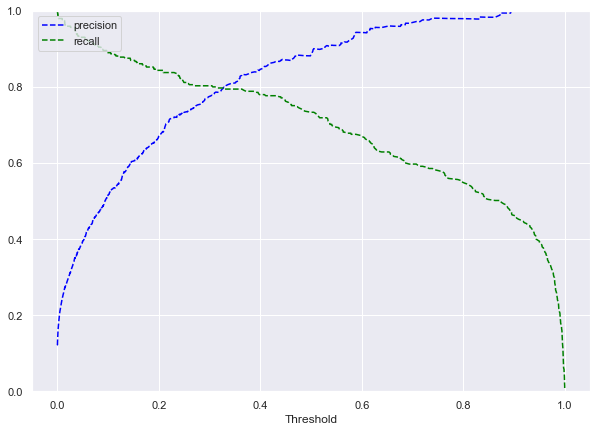

In [103]:
y_scores=lg1.predict(X_train_num1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At the threshold of 0.32, we get balanced recall and precision.

In [104]:
optimal_threshold_curve = 0.32

scores_LR = get_metrics_score1(lg1,X_train_num1,X_test_num1,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.958139534883721
Accuracy on test set :  0.9633898305084746
Recall on training set :  0.7971014492753623
Recall on test set :  0.7803030303030303
Precision on training set :  0.7879656160458453
Precision on test set :  0.8046875
F1 on training set :  0.7925072046109509
F1 on test set :  0.7923076923076924
ROC-AUC Score on training set :  0.8865959588864696
ROC-AUC Score on test set :  0.8808439946749701


- Recall, presicion and F1 are adjusted under the selected 0.32 as the optimal threshold

In [192]:
comparison_frame2 = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels','Logistic Regression - Optimal threshold = 0 .17',
                                          'Logistic Regression - Optimal threshold = 0 .32'], 'F1 Train_Recall':[0.80,0.73,0.79], 'F1 Test_Recall':[0.76,0.76,0.79]}) 
comparison_frame2

Model  F1 Train_Recall  \
0          Logistic Regression Model - Statsmodels             0.80   
1  Logistic Regression - Optimal threshold = 0 .17             0.73   
2  Logistic Regression - Optimal threshold = 0 .32             0.79   

   F1 Test_Recall  
0            0.76  
1            0.76  
2            0.79

### Conclusion from the logistic Regression

- We have been able to build a predictive model that can be used by All Life bank to find customers that gets perconal loans with an f1_score of 0.79 on the training set and formulate policies accordingly. (Statsmodels - Logistic Regression - with significant predictors).

- Coefficients like Age, Income, CCAvg, Regions, Education, CD_Account and Family of 3/4, are positive increase in this will lead to increase the chances of a person getting a personal loan thru the campaign.

- Coefficients like Family 2, Online banking, Securities Account, Credit Card and Online Banking, apperantly are negative increase and these, will leade to decrease in chances of a person to get a personal loan thru the campaign.


## Build Decision Tree Model

- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

- If the frequency of acceptance of Personal loan is  9.7% and the frequency of not getting a personal loan is 90.3%, then not getting personal loan will become the dominant class and the decision tree will become biased toward the dominant attibutes.

- In this case, we can pass a dictionary {0:0.903,1:0.097} to the model to specify the weight of each class and the decision tree will give more weightage to getting personal loan.

- Personal_Loan is a hyperparameter for the decision tree classifier.

In [105]:
dummy_data = pd.get_dummies(data, columns=['Securities_Account','Family','Education','Region','CD_Account','Online','CreditCard'],drop_first=True)
dummy_data.head()

Age  Experience  Income  CCAvg  Mortgage Personal_Loan  \
0   25           1    49.0    1.6       0.0             0   
1   45          19    34.0    1.5       0.0             0   
2   39          15    11.0    1.0       0.0             0   
3   35           9   100.0    2.7       0.0             0   
4   35           8    45.0    1.0       0.0             0   

   Securities_Account_1  Family_2  Family_3  Family_4  Education_2  \
0                     1         0         0         1            0   
1                     1         0         1         0            0   
2                     0         0         0         0            0   
3                     0         0         0         0            1   
4                     0         0         0         1            1   

   Education_3  Region_Extended_Bay_Area  Region_Northern_California  \
0            0                         0                           0   
1            0                         0                           0   
2            0                         1                           0   
3            0                         1                           0   
4            0                         0                           0   

   Region_Southern_California  CD_Account_1  Online_1  CreditCard_1  
0                           1             0         0             0  
1                           1             0         0             0  
2                           0             0         0             0  
3                           0             0         0             0  
4                           1             0         0             1

In [106]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account_1', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Region_Extended_Bay_Area', 'Region_Northern_California', 'Region_Southern_California', 'CD_Account_1', 'Online_1', 'CreditCard_1']


#### Split Data

In [107]:
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [108]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3440, 17) (1475, 17)


In [109]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.903,1:0.097},random_state=1)

In [110]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.903, 1: 0.097}, random_state=1)

In [111]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

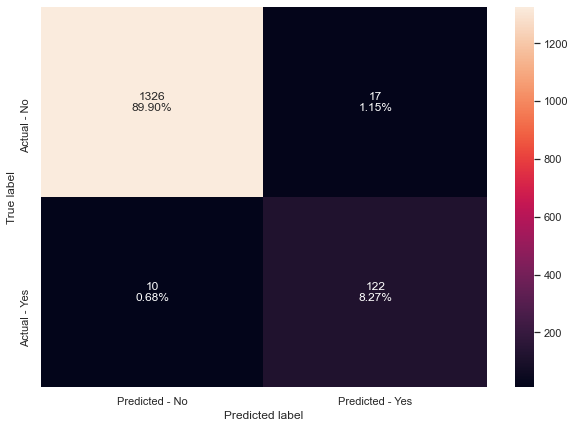

In [112]:
make_confusion_matrix(model,y_test)

In [113]:
y_train.value_counts(1)

0    0.899709
1    0.100291
Name: Personal_Loan, dtype: float64

- We only have 8.27% of positive classes, so if our model marks each sample as negative, then also we'll get 89% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- True Positives:

 - Reality: A customer get the Personal Loan.
 - Model predicted: The customer will contribute to the success of the campaign in more than 9%.
 - Outcome: The model is good.

- True Negatives:

 - Reality: A customer did NOT get the Personal Loan.
 - Model predicted: The customer will NOT contribute to the success of the campaign.
 - Outcome: The bank is unaffected.

- False Positives:

 - Reality: A customer did NOT get the Personal Loan.
 - Model predicted: The customer will contribute to the success of the campaign.
 - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the to the success of the campaign.

- False Negatives:

 - Reality: A customer got a personal loan.
 - Model predicted: The customer will NOT contribute to the success of the campaign.
 - Outcome: The potential customer is missed by the sales/marketing team, the bank could have offered the potential customer some less interest rate. 




- In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.


In [114]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))


In [115]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.9242424242424242


- Recall needs to be improved

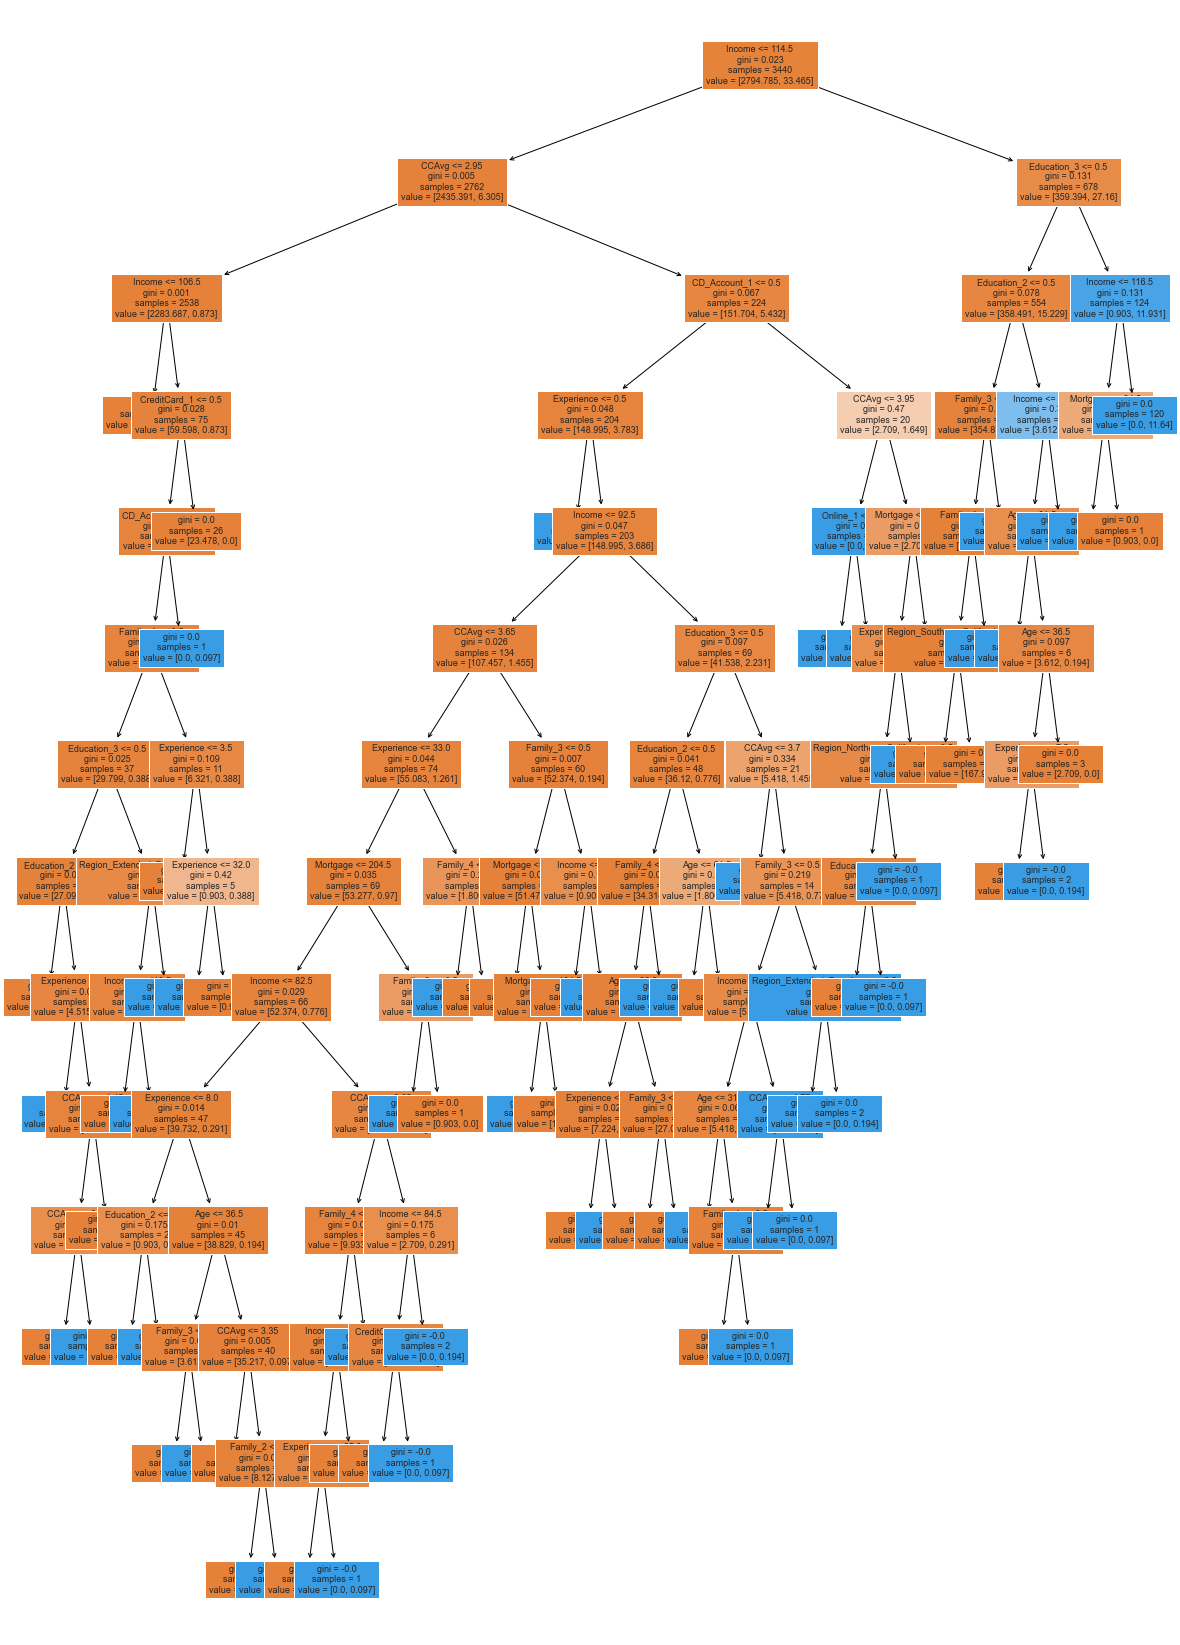

In [116]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 114.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2224.09, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [22.57, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- Experience <= 8.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |   |--- Experience >  8.00
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.45
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 0.85
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  0.85
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.

In [118]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
Education_3                 3.031169e-01
Education_2                 2.308784e-01
Income                      1.537449e-01
Family_3                    1.010603e-01
Family_4                    7.199788e-02
CCAvg                       3.947375e-02
Experience                  3.072015e-02
Age                         2.194435e-02
CD_Account_1                1.882637e-02
Mortgage                    1.697937e-02
CreditCard_1                3.073740e-03
Family_2                    2.898661e-03
Region_Extended_Bay_Area    2.642613e-03
Region_Northern_California  2.642613e-03
Region_Southern_California  8.935737e-15
Online_1                    7.164456e-18
Securities_Account_1        0.000000e+00


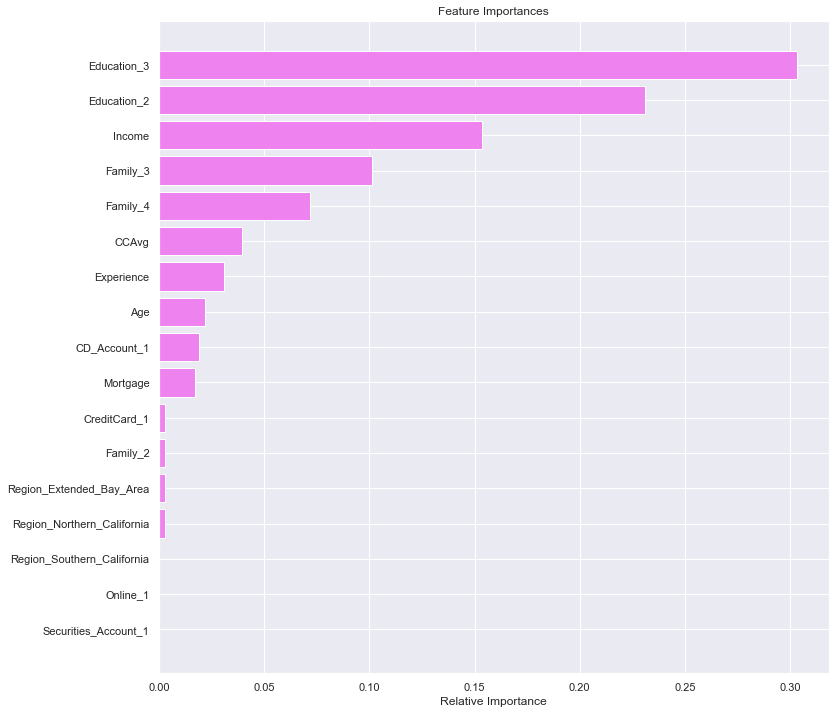

In [119]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- According to the decision tree model, Education_3 is the most important variable for predicting the Personal Loan Approval, and the less important is Securities_Account_1.

#### The tree above is very complex and difficult to interpret.

## Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model


- Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on a the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [161]:
from sklearn.model_selection import GridSearchCV

In [163]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:0.903,1:0.097})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.903, 1: 0.097}, criterion='entropy',
                       max_depth=9, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

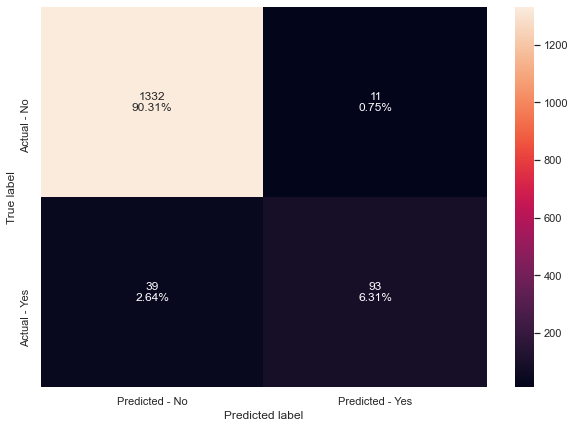

In [164]:
make_confusion_matrix(estimator,y_test)

In [165]:
get_recall_score(estimator)

Recall on training set :  0.7072463768115942
Recall on test set :  0.7045454545454546


#### Recall has decreased for both train and test set after hyperparameter tuning.

- True Positives Rate decreased
- True Negative increased, meaning Im failing predicting.
- Not very good model

## Visualizing the Decision Tree

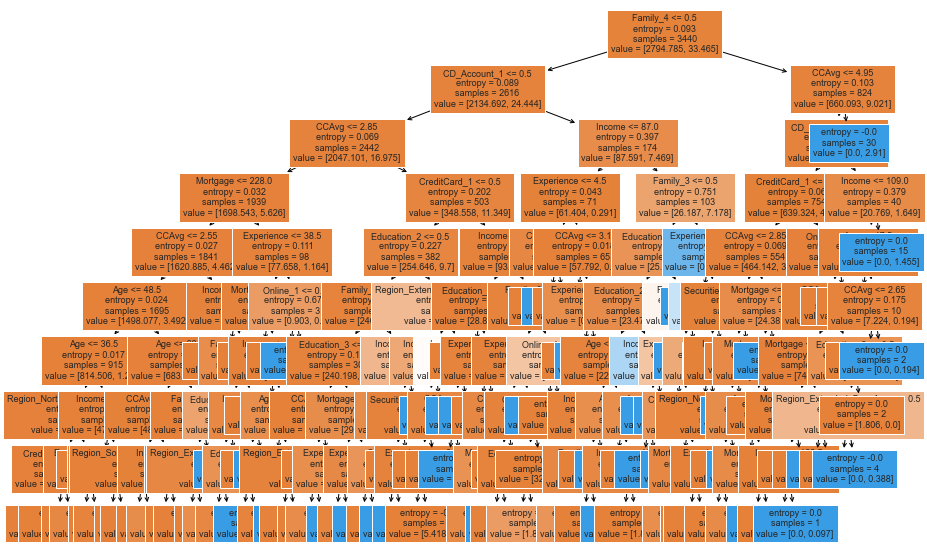

In [159]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [155]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Family_4 <= 0.50
|   |--- CD_Account_1 <= 0.50
|   |   |--- CCAvg <= 2.85
|   |   |   |--- Mortgage <= 228.00
|   |   |   |   |--- CCAvg <= 2.55
|   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |--- Region_Northern_California <= 0.50
|   |   |   |   |   |   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [230.26, 0.78] class: 0
|   |   |   |   |   |   |   |   |--- CreditCard_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [100.23, 0.10] class: 0
|   |   |   |   |   |   |   |--- Region_Northern_California >  0.50
|   |   |   |   |   |   |   |   |--- Experience <= 5.50
|   |   |   |   |   |   |   |   |   |--- weights: [4.52, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Experience >  5.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.81, 0.10] class: 0
|   |   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |   |--- Income <= 124.00
|   |   |   |   |   | 

In [166]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                 Imp
Income                      0.305829
CCAvg                       0.250012
Family_3                    0.084625
CD_Account_1                0.082471
Education_2                 0.068384
Education_3                 0.058142
Experience                  0.044508
Age                         0.030487
Mortgage                    0.026249
Online_1                    0.017177
Region_Extended_Bay_Area    0.009900
CreditCard_1                0.009381
Family_2                    0.008515
Securities_Account_1        0.001865
Region_Southern_California  0.000993
Region_Northern_California  0.000753
Family_4                    0.000709


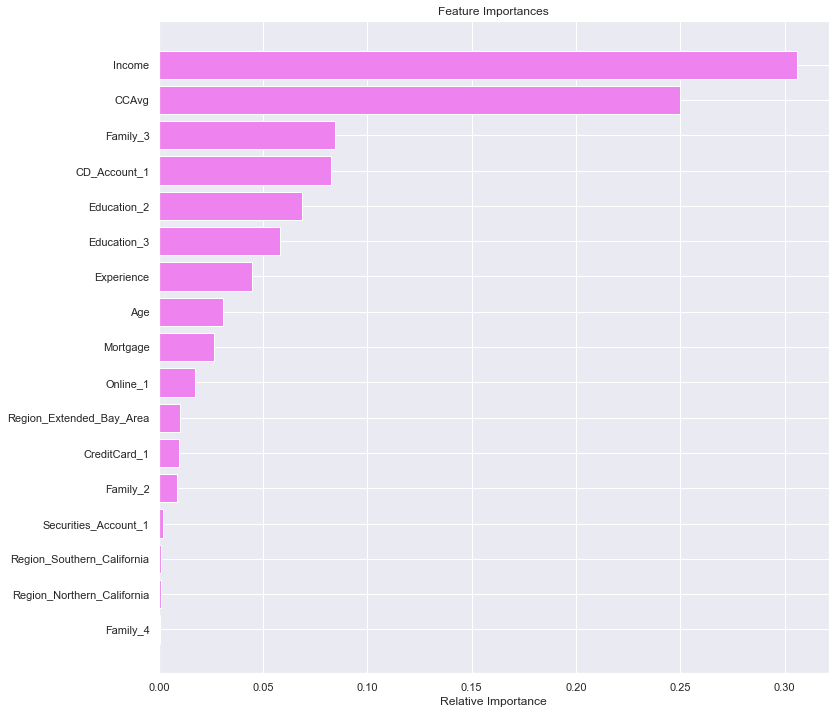

In [167]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important attribute is income and the less important is Family_4.
- Desicion tree still overfitting and hard to interpretate.

### Cost Complexity Pruning


The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [168]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.903,1:0.097})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [169]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -1.740678e-15
1   1.675394e-19 -1.740510e-15
2   6.092340e-19 -1.739901e-15
3   1.233699e-18 -1.738667e-15
4   3.190235e-18 -1.735477e-15
5   2.089604e-16 -1.526516e-15
6   3.357549e-05  6.715099e-05
7   3.396514e-05  1.350813e-04
8   3.404746e-05  3.393660e-04
9   3.417026e-05  4.760471e-04
10  3.420015e-05  5.444474e-04
11  3.453043e-05  6.135082e-04
12  4.487872e-05  7.481444e-04
13  5.370447e-05  1.016667e-03
14  5.770983e-05  1.362926e-03
15  6.194007e-05  1.548746e-03
16  6.509729e-05  1.678940e-03
17  6.622245e-05  1.811385e-03
18  6.646690e-05  1.944319e-03
19  6.801576e-05  2.012335e-03
20  6.826901e-05  2.217142e-03
21  1.175657e-04  2.334708e-03
22  1.235940e-04  2.458302e-03
23  1.529587e-04  2.611260e-03
24  1.556283e-04  2.766889e-03
25  1.716140e-04  3.968186e-03
26  2.940922e-04  4.850463e-03
27  4.380002e-04  5.288463e-03
28  1.296546e-03  6.585009e-03
29  1.656073e-03  8.241082e-03
30  1.953311e-03  1.019439e-02
31  4.396802e-03  2.338480e-02

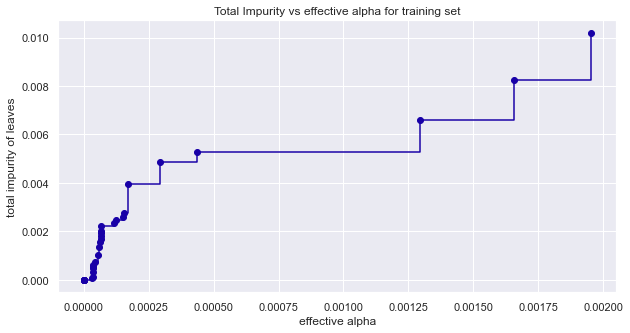

In [170]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- The bigger alpha, the bigger impurity

In [172]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.903,1:0.097})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004396801856189239


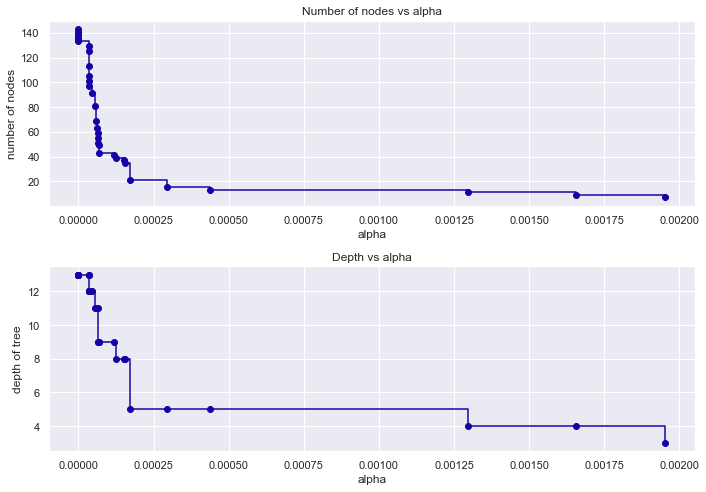

In [173]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [174]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [175]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [176]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

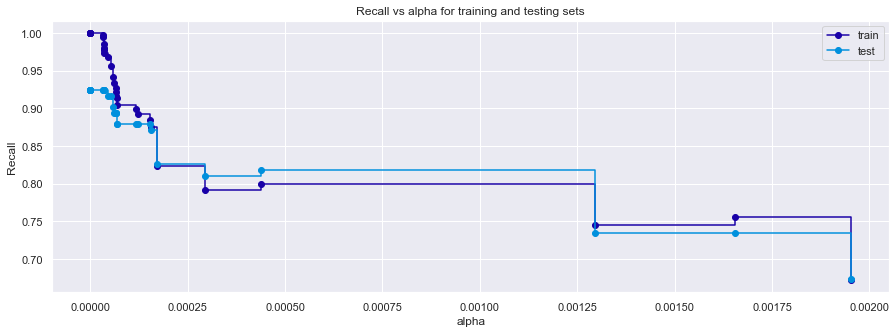

In [177]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

##### Maximum value of Recall is at 0.002 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0001 retaining information and getting higher recall.

In [178]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.903, 1: 0.097}, random_state=1)


In [179]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.903, 1: 0.097}, random_state=1)

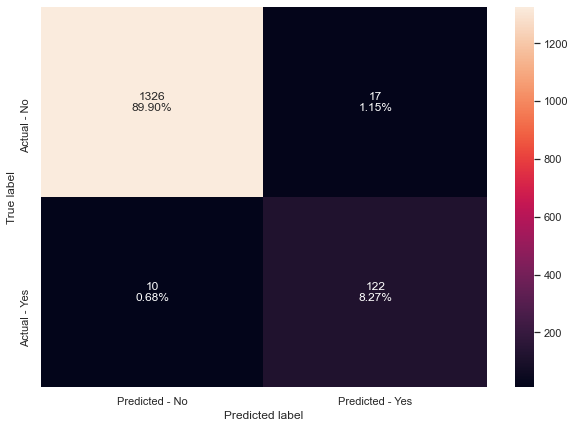

In [180]:
make_confusion_matrix(best_model,y_test)

In [181]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9242424242424242


## Visualizing the Decision Tree

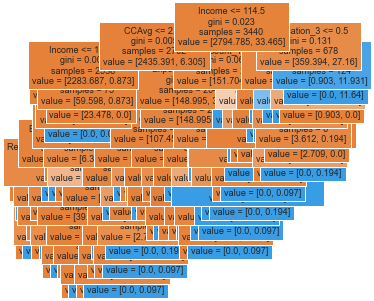

In [182]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

- This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

### Creating model with 0.0001 ccp_alpha

In [183]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.0001,
                       class_weight={0:0.903,1:0.097}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight={0: 0.903, 1: 0.097},
                       random_state=1)

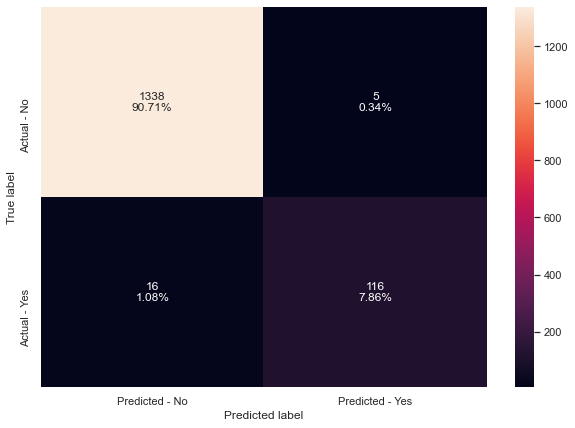

In [190]:
make_confusion_matrix(best_model2,y_test)

In [185]:
get_recall_score(best_model2)

Recall on training set :  0.9043478260869565
Recall on test set :  0.8787878787878788


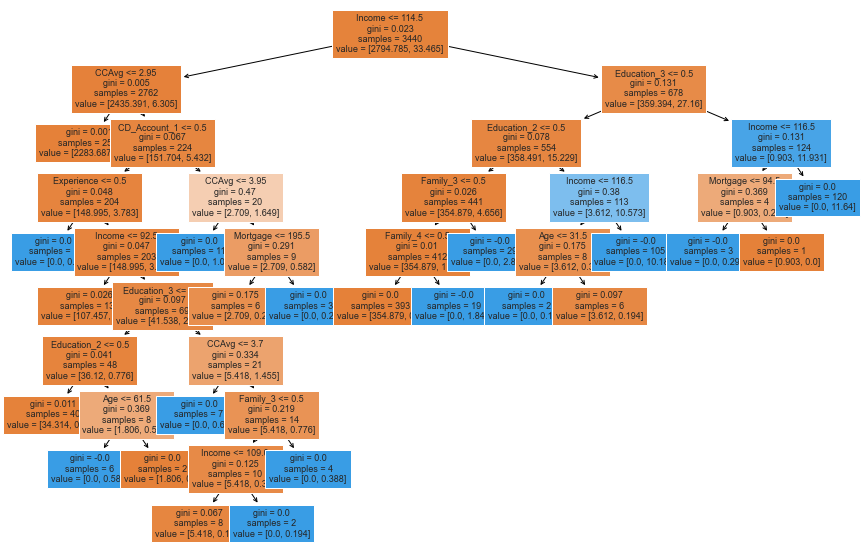

In [186]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [187]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 114.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2283.69, 0.87] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Experience <= 0.50
|   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |--- Experience >  0.50
|   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |--- weights: [107.46, 1.45] class: 0
|   |   |   |   |--- Income >  92.50
|   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [34.31, 0.19] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- Age <= 61.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.58] class: 1
|   |   |   |   |   |   |   |--- Age >  61.50
|   |   |   |   |   |   |   |   |--- weights: [1.81, 0.00] class: 0
|   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |--- CCAvg <= 3.70
|   |   |   |   |   |   |   |--- weights: [0.00, 0.68] class: 1
|   |  

In [188]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Education_3                 0.334553
Education_2                 0.248785
Income                      0.157309
Family_3                    0.102858
Family_4                    0.061251
CCAvg                       0.039621
Age                         0.020258
CD_Account_1                0.017701
Mortgage                    0.014578
Experience                  0.003084
Family_2                    0.000000
Securities_Account_1        0.000000
Region_Extended_Bay_Area    0.000000
Region_Northern_California  0.000000
Region_Southern_California  0.000000
Online_1                    0.000000
CreditCard_1                0.000000


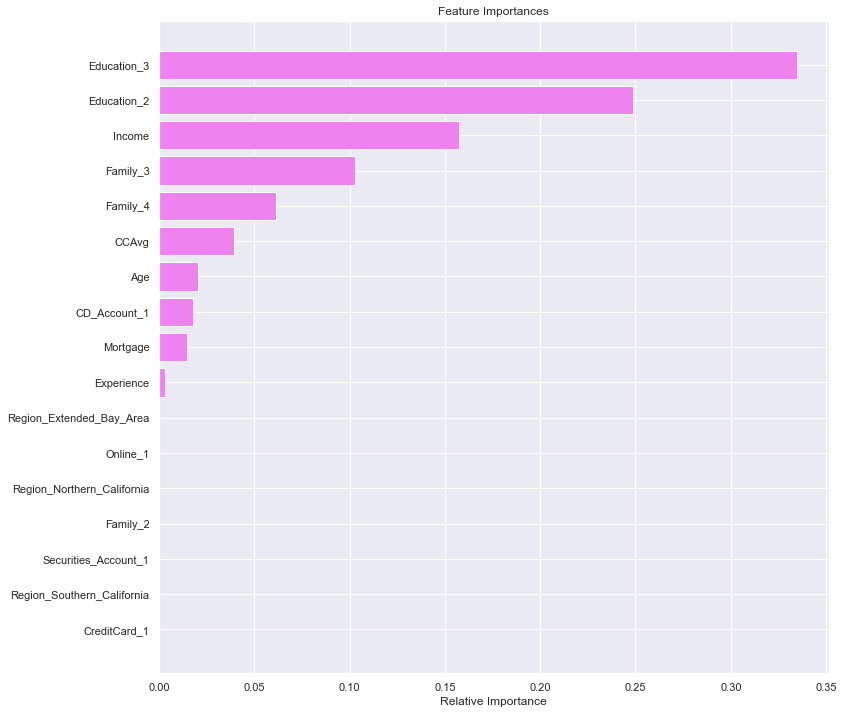

In [189]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important attribute is Education_3 and the least Important in CreditCard_1
- So far the best model to predict the success of the personal loan but very costly operation for the bank.

In [191]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.70,0.90], 'Test_Recall':[0.92,0.70,0.87]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0               Initial decision tree model           1.0         0.92
1  Decision tree with hyperparameter tuning           0.7         0.70
2           Decision tree with post-pruning           0.9         0.87

### Conclusion

- We analyzed the "Personal Loan Campaign Modelling" using different techniques and used Decision Tree Classifier to build a predictive model for the same.

- The model built can be used to predict if a customer is going to contribute to success of the campaign (by getting a Personal Loan) or not.

- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees. However, the one with the best recall is still very complex, highly cost and the return rate (TPR) of success (7.86%) doesn't compensate the bank expectations (more than 9%).

- Education 2/3, Income, Family 3/4 and CCAvg are the most important variable in predicting the customers that will contribute to the success of the campaign.

- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

- It is imperative performed a Random Forest Modelling for the data and analize if we can have improve the success of the campaign, a model that handle outliners well and works well on non linear data.

- The Bank is very focus on customers in Southern California and Extended Bay Area, However bank should be targeting their efforts specifically to segments that have income greater than 95K, active expending money in credit cards, home owners, in other areas where it found population that accomplish this profile.

- Other great target is customers with CD_Accounts. What about targeting people that handle this account from other banks?.

- Desicion Tree is not recomended to strategies a succesful campign on Personal Loan, due it is too complex, costly and would not deliver the expected results the bank is looking for.

- Check trends on the success that it is not predicted by the marketing team (False Negatives), offer better rates than the competitors.

- Logistic Regression it is a very useful tool, that perform well to predit the success of the campaign.